# 1. Project Introduction
**Coronavirus** is a family of viruses that can cause illness, which can vary from *common cold* and *cough* to sometimes more severe disease. **Middle East Respiratory Syndrome (MERS-CoV)** and **Severe Acute Respiratory Syndrome (SARS-CoV)** were such severe cases with the world already has faced.<br> **SARS-CoV-2 (n-coronavirus)** is the new virus of the coronavirus family, which first *discovered* in 2019, which has not been identified in humans before. 

It is a *contiguous* virus which started from **Wuhan** in **December 2019**. Which later declared as **Pandemic** by **WHO** due to high rate spreads throughout the world. Currently (on the date 10 June 2020), this leads to a total of *500K+ Deaths* across the globe.<br>

Pandemic is spreading all over the world; it becomes more important to understand about this spread. This NoteBook is an effort to analyze the cumulative data of confirmed, deaths, and recovered cases over time.
     <br>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center> 
    </font>
 <center><font face = "Verdana" size ="4"> Keep strong, world! Stay safe and healthy. </font><center>

<br>

# Table of contents
* [2. Downloading and Installing Prerequisite](#2.-Downloading-and-Installing-Prerequisite)
    
* [3. Downloading the Dataset](#3.-Downloading-the-Dataset)

* [4. Global Analysis](#4.-Global-Analysis)

    * [Problem 1](#Problem-1)
    * [Problem 2](#Problem-2)
    * [Problem 3](#Problem-3)
    * [Problem 4](#Problem-4)
    * [Problem 6](#Problem-5)
    * [Problem 6](#Problem-6)
    * [Problem 7](#Problem-7)

* [5. Continent Analysis](#5.-Continent-Analysis)
    * [Problem 8](#Problem-8)
    * [Problem 9](#Problem-9)
    * [Problem 10](#Problem-10)
    * [Problem 11](#Problem-11)
    * [Problem 12](#Problem-12)
    * [Problem 13](#Problem-13)

* [6. Country Analysis](#5.-Country-Analysis)
    * [Problem 14](#Problem-14)
    * [Problem 15](#Problem-15)
    * [Problem 16](#Problem-16)
    * [Problem 17](#Problem-17)
    
* [7. Advanced Analysis](#7.-Advanced-Analysis)
    * [Problem 18](#Problem-18)
    * [Problem 19](#Problem-19)
    * [Problem 20](#Problem-20)
    * [Problem 21](#Problem-21)
    * [Problem 22](#Problem-22)

# 2. Downloading and Installing Prerequisite
**pycountry_convert**: Using country data derived from wikipedia, this package provides conversion functions between ISO country names, country-codes, and continent names.

**folium, seaborn, plotly**: Some visualization packages in Python.

Uncomment and install some packages if you have not installed them. Otherwise, let continue.

In [1]:
#!pip install pycountry_convert 
#!pip install folium
#!pip install seaborn
#!pip install plotly

In [2]:
#Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
import folium
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

# 3. Downloading the Dataset

This dataset is updated on daily basis by Johns Hopkins CSSE.

In [4]:
# Global Data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

## Have a look at the general data:

In [5]:
confirmed_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  8/9/21  8/10/21  8/11/21  8/12/21  \
0        0        0        0        0  ...  150778   151013   151291   151563   
1        0        0        0        0  ...  133981   134201   134487   134761   
2        0        0        0        0  ...  182368   183347   184191   185042   
3        0        0        0        0  ...   14836    14873    14891    14908   
4        0        0        0        0  ...   43747    43890    43998    44174   

   8/13/21  8/14/21  8/15/21  8/16/21  8/17/21  8/18/21  
0   151770   151770   151770   152142   152243   152363  
1   135140   135550   135947   136147   136598   137075  
2   185902   186655   187258   187968   188663   189384  
3    14924    14924    14924    14954    14960    14976  
4    44328    44534    44617    44739    44972    45175  

[5 rows x 579 columns]

In [6]:
deaths_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  8/9/21  8/10/21  8/11/21  8/12/21  \
0        0        0        0        0  ...    6936     6961     6978     6988   
1        0        0        0        0  ...    2460     2460     2460     2460   
2        0        0        0        0  ...    4578     4618     4654     4695   
3        0        0        0        0  ...     128      129      129      129   
4        0        0        0        0  ...    1053     1057     1063     1070   

   8/13/21  8/14/21  8/15/21  8/16/21  8/17/21  8/18/21  
0     7000     7000     7000     7025     7031     7043  
1     2461     2463     2464     2466     2468     2471  
2     4730     4766     4794     4830     4867     4898  
3      129      129      129      129      129      129  
4     1082     1086     1100     1103     1118     1125  

[5 rows x 579 columns]

In [7]:
recoveries_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  8/9/21  8/10/21  8/11/21  8/12/21  \
0        0        0        0        0  ...       0        0        0        0   
1        0        0        0        0  ...       0        0        0        0   
2        0        0        0        0  ...       0        0        0        0   
3        0        0        0        0  ...       0        0        0        0   
4        0        0        0        0  ...       0        0        0        0   

   8/13/21  8/14/21  8/15/21  8/16/21  8/17/21  8/18/21  
0        0        0        0        0        0        0  
1        0        0        0        0        0        0  
2        0        0        0        0        0        0  
3        0        0        0        0        0        0  
4        0        0        0        0        0        0  

[5 rows x 579 columns]

#  4. Global Analysis

## Problem 1

    Calculate the number of total cases, total deaths, total recovered, and total active by time (day units).

In [8]:
confirmed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Columns: 579 entries, Province/State to 8/18/21
dtypes: float64(2), int64(575), object(2)
memory usage: 1.2+ MB


In [9]:
deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Columns: 579 entries, Province/State to 8/18/21
dtypes: float64(2), int64(575), object(2)
memory usage: 1.2+ MB


In [10]:
recoveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Columns: 579 entries, Province/State to 8/18/21
dtypes: float64(2), int64(575), object(2)
memory usage: 1.2+ MB


In [11]:
#lấy tọa độ của các nước, không trùng lặp
lat = []
long = []
c = ''
for country in confirmed_df.groupby('Country/Region').sum().index:
    if c != country:
        c = country
        lat.append(confirmed_df.loc[confirmed_df['Country/Region'] == "{}".format(c), "Lat"].values[0])
        long.append(confirmed_df.loc[confirmed_df['Country/Region'] == "{}".format(c), "Long"].values[0])

In [12]:
#nhóm dữ liệu của các nước chia theo vùng lại thành 1 hàng, do tọa độ cũng được cộng trong groupby nên đưa list tọa độ vào, lấy 500 ngày
confirmed_df1 = confirmed_df.iloc[:,:504].groupby('Country/Region').sum()
confirmed_df1.index.name=None
confirmed_df1['Lat'] = lat
confirmed_df1['Long'] = long
confirmed_df1.head()

Lat       Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
Afghanistan  33.93911  67.709953        0        0        0        0        0   
Albania      41.15330  20.168300        0        0        0        0        0   
Algeria      28.03390   1.659600        0        0        0        0        0   
Andorra      42.50630   1.521800        0        0        0        0        0   
Angola      -11.20270  17.873900        0        0        0        0        0   

             1/27/20  1/28/20  1/29/20  ...  5/26/21  5/27/21  5/28/21  \
Afghanistan        0        0        0  ...    67743    68366    69130   
Albania            0        0        0  ...   132244   132264   132285   
Algeria            0        0        0  ...   127646   127926   128198   
Andorra            0        0        0  ...    13671    13682    13693   
Angola             0        0        0  ...    33338    33607    33944   

             5/29/21  5/30/21  5/31/21  6/1/21  6/2/21  6/3/21  6/4/21  
Afghanistan    70111    70761    71838   72977   74026   75119   76628  
Albania       132297   132309   132315  132337  132351  132360  132372  
Algeria       128456   128725   128913  129218  129640  129976  130361  
Andorra        13693    13693    13727   13729   13744   13752   13758  
Angola         34180    34366    34551   34752   34960   35140   35307  

[5 rows x 502 columns]

In [13]:
deaths_df1 = deaths_df.iloc[:,:504].groupby('Country/Region').sum()
deaths_df1.index.name=None
deaths_df1['Lat'] = lat
deaths_df1['Long'] = long
deaths_df1.head()

Lat       Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
Afghanistan  33.93911  67.709953        0        0        0        0        0   
Albania      41.15330  20.168300        0        0        0        0        0   
Algeria      28.03390   1.659600        0        0        0        0        0   
Andorra      42.50630   1.521800        0        0        0        0        0   
Angola      -11.20270  17.873900        0        0        0        0        0   

             1/27/20  1/28/20  1/29/20  ...  5/26/21  5/27/21  5/28/21  \
Afghanistan        0        0        0  ...     2855     2869     2881   
Albania            0        0        0  ...     2447     2447     2448   
Algeria            0        0        0  ...     3440     3448     3455   
Andorra            0        0        0  ...      127      127      127   
Angola             0        0        0  ...      742      745      749   

             5/29/21  5/30/21  5/31/21  6/1/21  6/2/21  6/3/21  6/4/21  
Afghanistan     2899     2919     2944    2973    3007    3034    3068  
Albania         2449     2450     2451    2451    2451    2451    2451  
Algeria         3460     3465     3472    3480    3490    3497    3504  
Andorra          127      127      127     127     127     127     127  
Angola           757      764      766     772     780     784     788  

[5 rows x 502 columns]

In [14]:
recoveries_df1 = recoveries_df.iloc[:,:504].groupby('Country/Region').sum()
recoveries_df1.index.name=None
recoveries_df1['Lat'] = lat
recoveries_df1['Long'] = long
recoveries_df1.head()

Lat       Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
Afghanistan  33.93911  67.709953        0        0        0        0        0   
Albania      41.15330  20.168300        0        0        0        0        0   
Algeria      28.03390   1.659600        0        0        0        0        0   
Andorra      42.50630   1.521800        0        0        0        0        0   
Angola      -11.20270  17.873900        0        0        0        0        0   

             1/27/20  1/28/20  1/29/20  ...  5/26/21  5/27/21  5/28/21  \
Afghanistan        0        0        0  ...    56711    56962    57119   
Albania            0        0        0  ...   128978   129042   129097   
Algeria            0        0        0  ...    88861    89040    89232   
Andorra            0        0        0  ...    13381    13405    13416   
Angola             0        0        0  ...    27467    27529    27577   

             5/29/21  5/30/21  5/31/21  6/1/21  6/2/21  6/3/21  6/4/21  
Afghanistan    57281    57450    57629   57741   57963   58070   58144  
Albania       129215   129308   129431  129473  129521  129566  129598  
Algeria        89419    89625    89839   90057   90281   90517   90767  
Andorra        13416    13416    13458   13479   13507   13527   13527  
Angola         27646    27766    28079   28190   28264   28646   28802  

[5 rows x 502 columns]

In [15]:
#tạo bảng active_df1 
active_df1 = pd.DataFrame(data=confirmed_df1.iloc[:,:2], columns=confirmed_df1.columns)
active_df1.iloc[:,2:] = confirmed_df1.iloc[:,2:] - (deaths_df1.iloc[:,2:] + recoveries_df1.iloc[:,2:])
active_df1.head()

Lat       Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
Afghanistan  33.93911  67.709953        0        0        0        0        0   
Albania      41.15330  20.168300        0        0        0        0        0   
Algeria      28.03390   1.659600        0        0        0        0        0   
Andorra      42.50630   1.521800        0        0        0        0        0   
Angola      -11.20270  17.873900        0        0        0        0        0   

             1/27/20  1/28/20  1/29/20  ...  5/26/21  5/27/21  5/28/21  \
Afghanistan        0        0        0  ...     8177     8535     9130   
Albania            0        0        0  ...      819      775      740   
Algeria            0        0        0  ...    35345    35438    35511   
Andorra            0        0        0  ...      163      150      150   
Angola             0        0        0  ...     5129     5333     5618   

             5/29/21  5/30/21  5/31/21  6/1/21  6/2/21  6/3/21  6/4/21  
Afghanistan     9931    10392    11265   12263   13056   14015   15416  
Albania          633      551      433     413     379     343     323  
Algeria        35577    35635    35602   35681   35869   35962   36090  
Andorra          150      150      142     123     110      98     104  
Angola          5777     5836     5706    5790    5916    5710    5717  

[5 rows x 502 columns]

In [16]:
cols = confirmed_df1.keys()
confirmed = confirmed_df1.iloc[:, 2:]
deaths = deaths_df1.iloc[:, 2:]
recoveries = recoveries_df1.iloc[:, 2:]
active = active_df1.iloc[:,2:]
dates = confirmed.keys()

total_cases = []
total_deaths = []
mortality_rate = []
recovery_rate = []
total_recovered = []
total_active = []
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])

#Insert your code here:

In [17]:
confirmed.head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
Afghanistan        0        0        0        0        0        0        0   
Albania            0        0        0        0        0        0        0   
Algeria            0        0        0        0        0        0        0   
Andorra            0        0        0        0        0        0        0   
Angola             0        0        0        0        0        0        0   

             1/29/20  1/30/20  1/31/20  ...  5/26/21  5/27/21  5/28/21  \
Afghanistan        0        0        0  ...    67743    68366    69130   
Albania            0        0        0  ...   132244   132264   132285   
Algeria            0        0        0  ...   127646   127926   128198   
Andorra            0        0        0  ...    13671    13682    13693   
Angola             0        0        0  ...    33338    33607    33944   

             5/29/21  5/30/21  5/31/21  6/1/21  6/2/21  6/3/21  6/4/21  
Afghanistan    70111    70761    71838   72977   74026   75119   76628  
Albania       132297   132309   132315  132337  132351  132360  132372  
Algeria       128456   128725   128913  129218  129640  129976  130361  
Andorra        13693    13693    13727   13729   13744   13752   13758  
Angola         34180    34366    34551   34752   34960   35140   35307  

[5 rows x 500 columns]

In [18]:
deaths.head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
Afghanistan        0        0        0        0        0        0        0   
Albania            0        0        0        0        0        0        0   
Algeria            0        0        0        0        0        0        0   
Andorra            0        0        0        0        0        0        0   
Angola             0        0        0        0        0        0        0   

             1/29/20  1/30/20  1/31/20  ...  5/26/21  5/27/21  5/28/21  \
Afghanistan        0        0        0  ...     2855     2869     2881   
Albania            0        0        0  ...     2447     2447     2448   
Algeria            0        0        0  ...     3440     3448     3455   
Andorra            0        0        0  ...      127      127      127   
Angola             0        0        0  ...      742      745      749   

             5/29/21  5/30/21  5/31/21  6/1/21  6/2/21  6/3/21  6/4/21  
Afghanistan     2899     2919     2944    2973    3007    3034    3068  
Albania         2449     2450     2451    2451    2451    2451    2451  
Algeria         3460     3465     3472    3480    3490    3497    3504  
Andorra          127      127      127     127     127     127     127  
Angola           757      764      766     772     780     784     788  

[5 rows x 500 columns]

In [19]:
recoveries.head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
Afghanistan        0        0        0        0        0        0        0   
Albania            0        0        0        0        0        0        0   
Algeria            0        0        0        0        0        0        0   
Andorra            0        0        0        0        0        0        0   
Angola             0        0        0        0        0        0        0   

             1/29/20  1/30/20  1/31/20  ...  5/26/21  5/27/21  5/28/21  \
Afghanistan        0        0        0  ...    56711    56962    57119   
Albania            0        0        0  ...   128978   129042   129097   
Algeria            0        0        0  ...    88861    89040    89232   
Andorra            0        0        0  ...    13381    13405    13416   
Angola             0        0        0  ...    27467    27529    27577   

             5/29/21  5/30/21  5/31/21  6/1/21  6/2/21  6/3/21  6/4/21  
Afghanistan    57281    57450    57629   57741   57963   58070   58144  
Albania       129215   129308   129431  129473  129521  129566  129598  
Algeria        89419    89625    89839   90057   90281   90517   90767  
Andorra        13416    13416    13458   13479   13507   13527   13527  
Angola         27646    27766    28079   28190   28264   28646   28802  

[5 rows x 500 columns]

In [20]:
active.head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
Afghanistan        0        0        0        0        0        0        0   
Albania            0        0        0        0        0        0        0   
Algeria            0        0        0        0        0        0        0   
Andorra            0        0        0        0        0        0        0   
Angola             0        0        0        0        0        0        0   

             1/29/20  1/30/20  1/31/20  ...  5/26/21  5/27/21  5/28/21  \
Afghanistan        0        0        0  ...     8177     8535     9130   
Albania            0        0        0  ...      819      775      740   
Algeria            0        0        0  ...    35345    35438    35511   
Andorra            0        0        0  ...      163      150      150   
Angola             0        0        0  ...     5129     5333     5618   

             5/29/21  5/30/21  5/31/21  6/1/21  6/2/21  6/3/21  6/4/21  
Afghanistan     9931    10392    11265   12263   13056   14015   15416  
Albania          633      551      433     413     379     343     323  
Algeria        35577    35635    35602   35681   35869   35962   36090  
Andorra          150      150      142     123     110      98     104  
Angola          5777     5836     5706    5790    5916    5710    5717  

[5 rows x 500 columns]

In [21]:
#đổi tên cột
confirmed.columns = adjusted_dates
deaths.columns = adjusted_dates
recoveries.columns = adjusted_dates
active.columns = adjusted_dates

In [22]:
#lấy số liệu ngày cuối cùng (là tổng của các ngày trước)
total_cases.append(confirmed.iloc[:,-1].sum())
total_deaths.append(deaths.iloc[:,-1].sum())
total_recovered.append(recoveries.iloc[:,-1].sum())
total_active.append(active.iloc[:,-1].sum())

In [23]:
#  The number of total cases, total deaths, total recovered, and total active until now.
print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recovered[-1])
print("Total active cases: ", total_active[-1])

Total confirmed cases:  172590480
Total death cases:  3716031
Total recoveries cases:  110226716
Total active cases:  58647733


## Problem 2

    Visualize the number and the log(10) of total cases, total deaths, total recovered, and total active by time (day units) in 2 graph (one for the number and the other for the log(10)) using line chart.

In [24]:
#Insert your code here:


In [25]:
case_overtime = pd.DataFrame(columns=adjusted_dates)
case_overtime.loc[0] = confirmed.sum(axis=0)
case_overtime.loc[1] = deaths.sum(axis=0)
case_overtime.loc[2] = recoveries.sum(axis=0)
case_overtime.loc[3] = active.sum(axis=0)
case_overtime.rename(index={0:'total case',1:'total deaths',2:'total recovered',3:'total active'},inplace=True)
case_overtime

0    1    2     3     4     5     6     7     8     9    ...  \
total case       557  655  941  1433  2118  2927  5578  6167  8235  9927  ...   
total deaths      17   18   26    42    56    82   131   133   171   213  ...   
total recovered   30   32   39    42    56    65   108   127   145   225  ...   
total active     510  605  876  1349  2006  2780  5339  5907  7919  9489  ...   

                       490        491        492        493        494  \
total case       168425525  168980229  169480496  169961717  170353101   
total deaths       3615212    3628269    3640233    3650982    3659273   
total recovered  105380748  106078106  106633069  107140669  107630598   
total active      59429565   59273854   59207194   59170066   59063230   

                       495        496        497        498        499  
total case       170731978  171195775  171681500  172170725  172590480  
total deaths       3667987    3683332    3695151    3705067    3716031  
total recovered  108159767  108743650  109272024  109701214  110226716  
total active      58904224   58768793   58714325   58764444   58647733  

[4 rows x 500 columns]

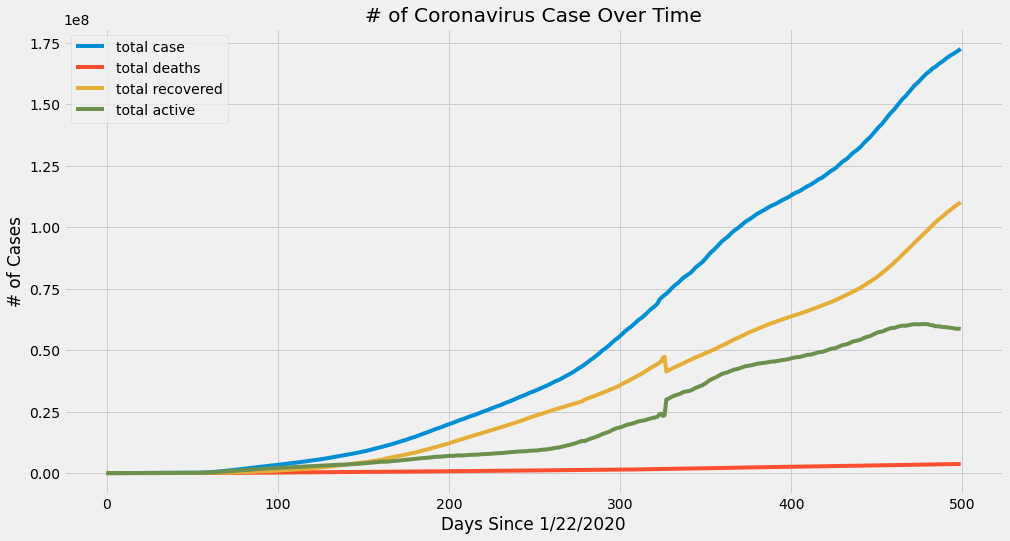

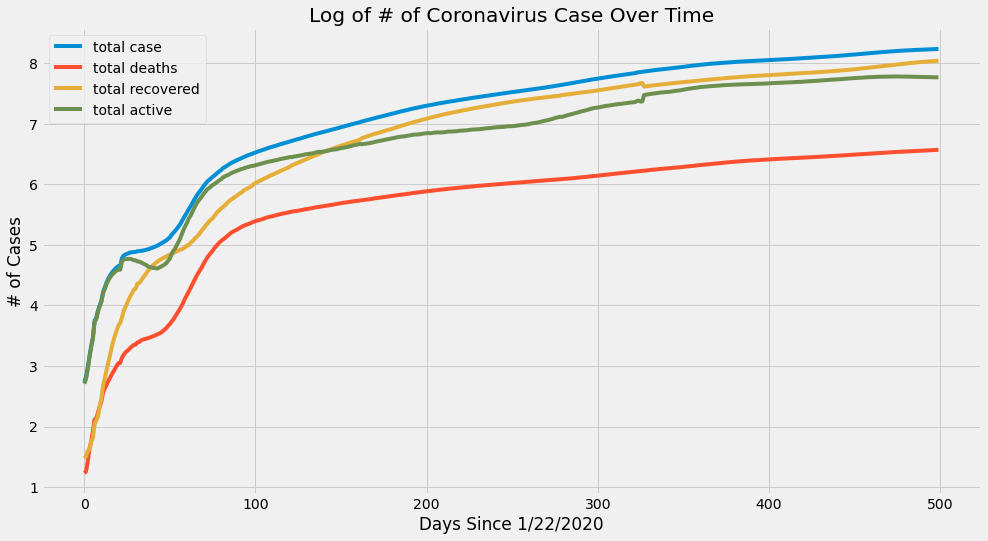

In [26]:
case_overtime.transpose().plot(kind='line',
                            figsize=(15,8))
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')
plt.title('# of Coronavirus Case Over Time')
plt.show()

import math
case_overtime_log10 = case_overtime
for i in range(case_overtime_log10.shape[0]):
    for j in range(case_overtime_log10.shape[1]):
        if case_overtime_log10.iloc[i,j] == 0:
            case_overtime_log10.iloc[i,j] += 1
        case_overtime_log10.iloc[i,j] = math.log10(case_overtime_log10.iloc[i,j])
case_overtime_log10.transpose().plot(kind='line',
                            figsize=(15,8))
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')
plt.title('Log of # of Coronavirus Case Over Time')
plt.show()

## Problem 3
    Visualize the number of total cases, total deaths, total recovered, and total active by time (day units) in 4 separated graphs using line chart.

In [27]:
#Insert your code here:


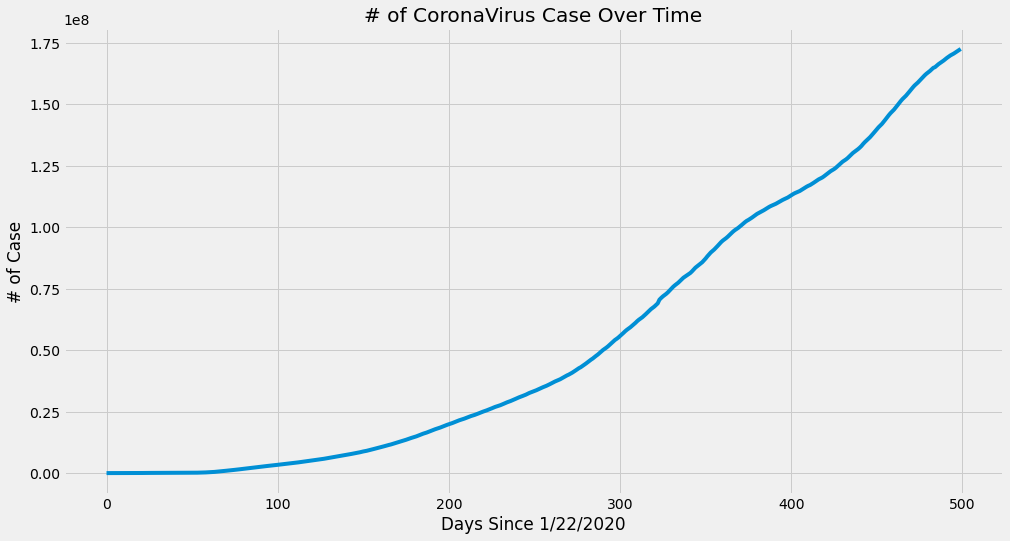

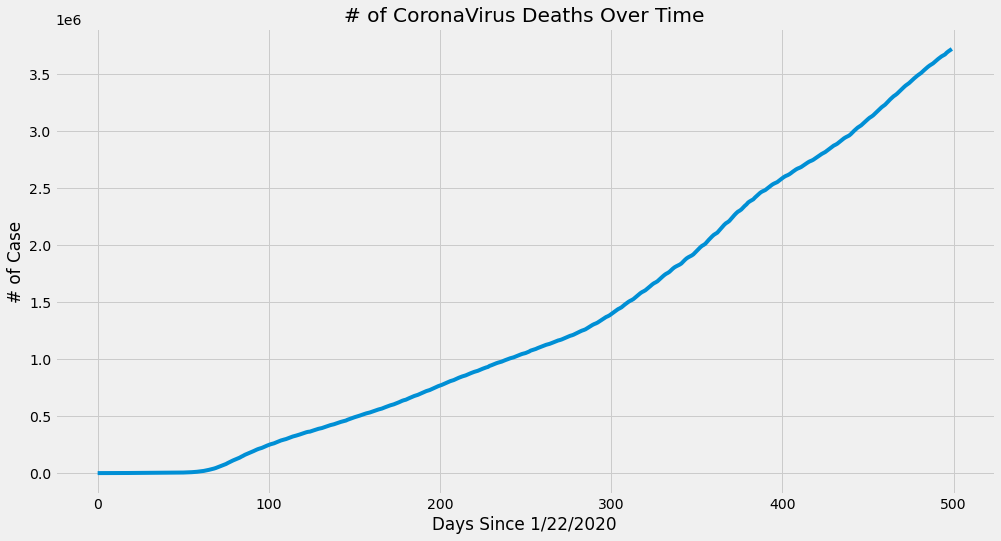

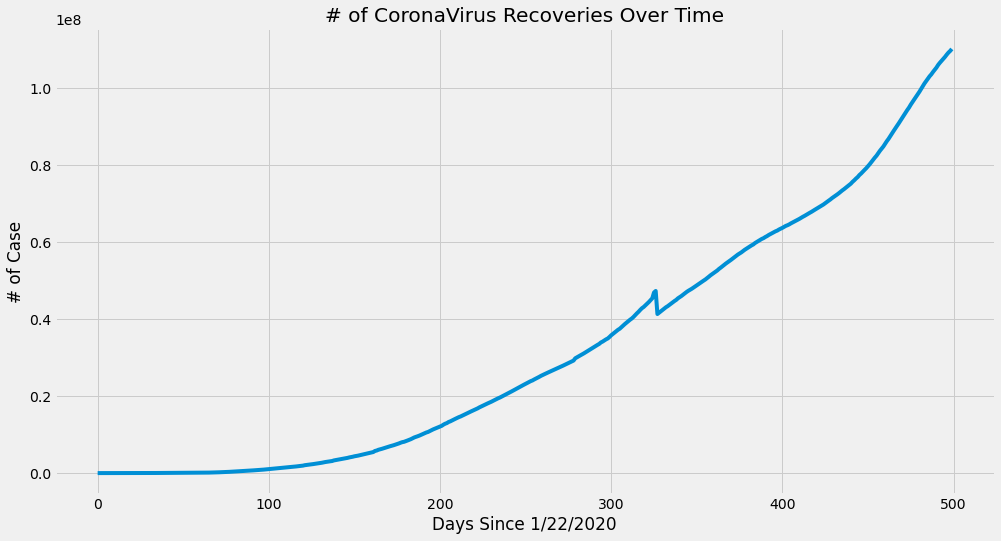

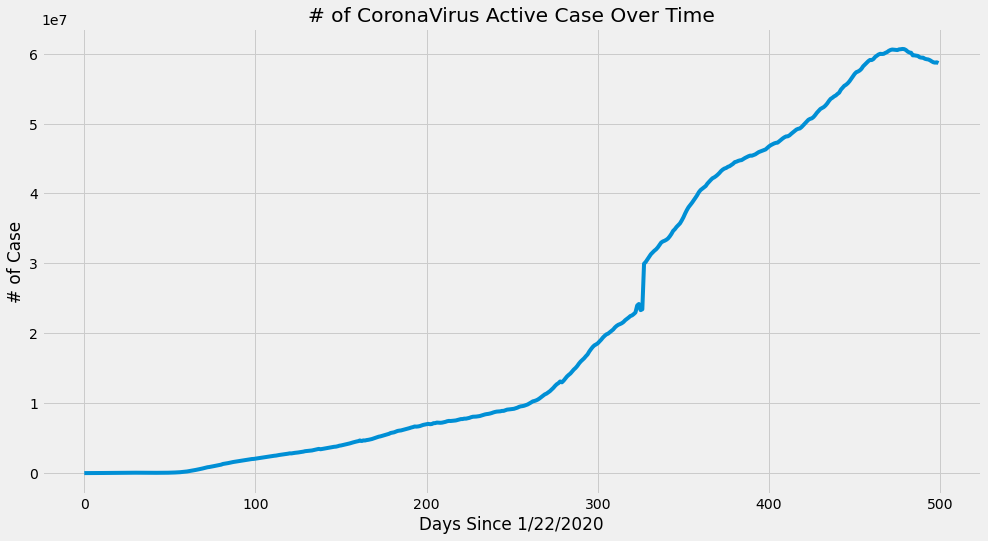

In [28]:
confirmed.sum(axis=0).plot(kind='line',figsize=(15,8))
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Case')
plt.title('# of CoronaVirus Case Over Time')
plt.show()

deaths.sum(axis=0).plot(kind='line',figsize=(15,8))
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Case')
plt.title('# of CoronaVirus Deaths Over Time')
plt.show()

recoveries.sum(axis=0).plot(kind='line',figsize=(15,8))
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Case')
plt.title('# of CoronaVirus Recoveries Over Time')
plt.show()

active.sum(axis=0).plot(kind='line',figsize=(15,8))
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Case')
plt.title('# of CoronaVirus Active Case Over Time')
plt.show()

## Problem 4
    Calculate the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units).

In [29]:
#Insert your code here:
confirmed_daily = pd.DataFrame(columns=adjusted_dates,index=confirmed.index)
confirmed_daily[0] = confirmed[0]

deaths_daily = pd.DataFrame(columns=adjusted_dates,index=deaths.index)
deaths_daily[0] = deaths[0]

recoveries_daily = pd.DataFrame(columns=adjusted_dates,index=recoveries.index)
recoveries_daily[0] = recoveries[0]

active_daily = pd.DataFrame(columns=adjusted_dates,index=active.index)
active_daily[0] = active[0]

for i in range(1,confirmed.shape[1]):
    confirmed_daily[i] = confirmed[i]-confirmed[i-1]
    deaths_daily[i] = deaths[i]-deaths[i-1]
    recoveries_daily[i] = recoveries[i]-recoveries[i-1]
    active_daily[i] = active[i]-active[i-1]

In [30]:
confirmed_daily

0    1    2    3    4    5    6    7    8    9    ...  \
Afghanistan           0    0    0    0    0    0    0    0    0    0  ...   
Albania               0    0    0    0    0    0    0    0    0    0  ...   
Algeria               0    0    0    0    0    0    0    0    0    0  ...   
Andorra               0    0    0    0    0    0    0    0    0    0  ...   
Angola                0    0    0    0    0    0    0    0    0    0  ...   
...                 ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
Vietnam               0    2    0    0    0    0    0    0    0    0  ...   
West Bank and Gaza    0    0    0    0    0    0    0    0    0    0  ...   
Yemen                 0    0    0    0    0    0    0    0    0    0  ...   
Zambia                0    0    0    0    0    0    0    0    0    0  ...   
Zimbabwe              0    0    0    0    0    0    0    0    0    0  ...   

                    490  491  492  493  494   495   496   497   498   499  
Afghanistan         840  623  764  981  650  1077  1139  1049  1093  1509  
Albania              15   20   21   12   12     6    22    14     9    12  
Algeria             285  280  272  258  269   188   305   422   336   385  
Andorra               7   11   11    0    0    34     2    15     8     6  
Angola              405  269  337  236  186   185   201   208   180   167  
...                 ...  ...  ...  ...  ...   ...   ...   ...   ...   ...  
Vietnam             155  270   40  512  199   325   193   245   193   301  
West Bank and Gaza  461    0  774  269  210   302   382   304   297   311  
Yemen                18    8   27    8    6     5     9     8     8     6  
Zambia              199  320  483  321  299   213   558   742   825   988  
Zimbabwe            113   35   64   15   11    17    37    33    61    52  

[195 rows x 500 columns]

In [31]:
deaths_daily

0    1    2    3    4    5    6    7    8    9    ...  \
Afghanistan           0    0    0    0    0    0    0    0    0    0  ...   
Albania               0    0    0    0    0    0    0    0    0    0  ...   
Algeria               0    0    0    0    0    0    0    0    0    0  ...   
Andorra               0    0    0    0    0    0    0    0    0    0  ...   
Angola                0    0    0    0    0    0    0    0    0    0  ...   
...                 ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
Vietnam               0    0    0    0    0    0    0    0    0    0  ...   
West Bank and Gaza    0    0    0    0    0    0    0    0    0    0  ...   
Yemen                 0    0    0    0    0    0    0    0    0    0  ...   
Zambia                0    0    0    0    0    0    0    0    0    0  ...   
Zimbabwe              0    0    0    0    0    0    0    0    0    0  ...   

                    490  491  492  493  494  495  496  497  498  499  
Afghanistan          19   14   12   18   20   25   29   34   27   34  
Albania               0    0    1    1    1    1    0    0    0    0  
Algeria               7    8    7    5    5    7    8   10    7    7  
Andorra               0    0    0    0    0    0    0    0    0    0  
Angola                7    3    4    8    7    2    6    8    4    4  
...                 ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
Vietnam               1    1    1    0    0    0    1    1    0    2  
West Bank and Gaza    3    0    6    3    3    2    6    4    2    2  
Yemen                 2    2    1    3    1    1    1    1    2    0  
Zambia                2    2    0    1    2    3    1    2    4    9  
Zimbabwe              2    3    0    2    0    0    5    0    5    1  

[195 rows x 500 columns]

In [32]:
recoveries_daily

0    1    2    3    4    5    6    7    8    9    ...  \
Afghanistan           0    0    0    0    0    0    0    0    0    0  ...   
Albania               0    0    0    0    0    0    0    0    0    0  ...   
Algeria               0    0    0    0    0    0    0    0    0    0  ...   
Andorra               0    0    0    0    0    0    0    0    0    0  ...   
Angola                0    0    0    0    0    0    0    0    0    0  ...   
...                 ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
Vietnam               0    0    0    0    0    0    0    0    0    0  ...   
West Bank and Gaza    0    0    0    0    0    0    0    0    0    0  ...   
Yemen                 0    0    0    0    0    0    0    0    0    0  ...   
Zambia                0    0    0    0    0    0    0    0    0    0  ...   
Zimbabwe              0    0    0    0    0    0    0    0    0    0  ...   

                    490  491  492  493  494  495  496  497  498  499  
Afghanistan         193  251  157  162  169  179  112  222  107   74  
Albania              71   64   55  118   93  123   42   48   45   32  
Algeria             189  179  192  187  206  214  218  224  236  250  
Andorra             118   24   11    0    0   42   21   28   20    0  
Angola              263   62   48   69  120  313  111   74  382  156  
...                 ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
Vietnam              59    0   43    0   54   79   14   42    0  157  
West Bank and Gaza  535    0  566  399  137  115  143  294  230  101  
Yemen                33   33   36   24   28   18   27    0   12   27  
Zambia               18   82  122  151  158  204   83   69  212  194  
Zimbabwe             14   10   22   15   13    3   30   37   19   10  

[195 rows x 500 columns]

In [33]:
active_daily

0    1    2    3    4    5    6    7    8    9    ...  \
Afghanistan           0    0    0    0    0    0    0    0    0    0  ...   
Albania               0    0    0    0    0    0    0    0    0    0  ...   
Algeria               0    0    0    0    0    0    0    0    0    0  ...   
Andorra               0    0    0    0    0    0    0    0    0    0  ...   
Angola                0    0    0    0    0    0    0    0    0    0  ...   
...                 ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
Vietnam               0    2    0    0    0    0    0    0    0    0  ...   
West Bank and Gaza    0    0    0    0    0    0    0    0    0    0  ...   
Yemen                 0    0    0    0    0    0    0    0    0    0  ...   
Zambia                0    0    0    0    0    0    0    0    0    0  ...   
Zimbabwe              0    0    0    0    0    0    0    0    0    0  ...   

                    490  491  492  493  494  495  496  497  498   499  
Afghanistan         628  358  595  801  461  873  998  793  959  1401  
Albania             -56  -44  -35 -107  -82 -118  -20  -34  -36   -20  
Algeria              89   93   73   66   58  -33   79  188   93   128  
Andorra            -111  -13    0    0    0   -8  -19  -13  -12     6  
Angola              135  204  285  159   59 -130   84  126 -206     7  
...                 ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  
Vietnam              95  269   -4  512  145  246  178  202  193   142  
West Bank and Gaza  -77    0  202 -133   70  185  233    6   65   208  
Yemen               -17  -27  -10  -19  -23  -14  -19    7   -6   -21  
Zambia              179  236  361  169  139    6  474  671  609   785  
Zimbabwe             97   22   42   -2   -2   14    2   -4   37    41  

[195 rows x 500 columns]

## Problem 5
    Visualize the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units) in 4 separate graphs using the bar chart.

In [34]:
#Insert your code here:


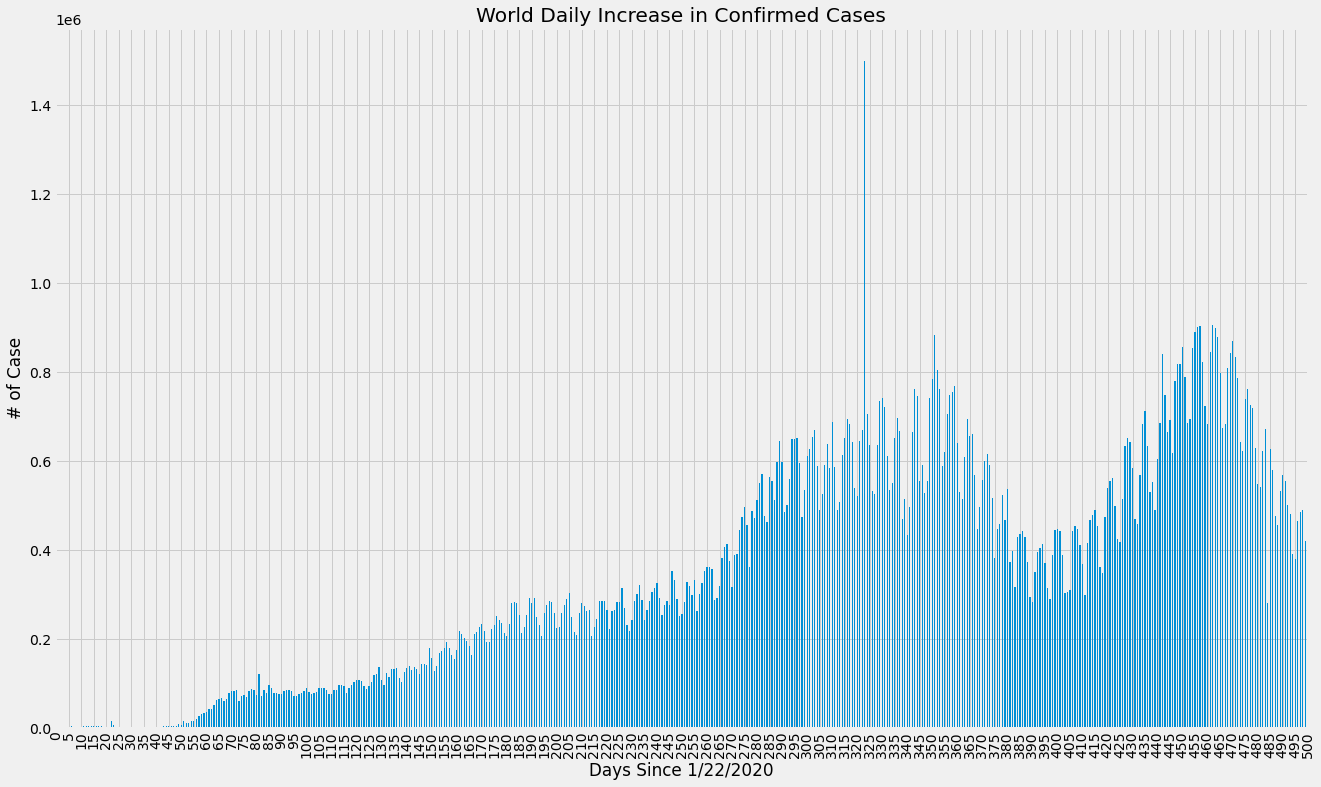

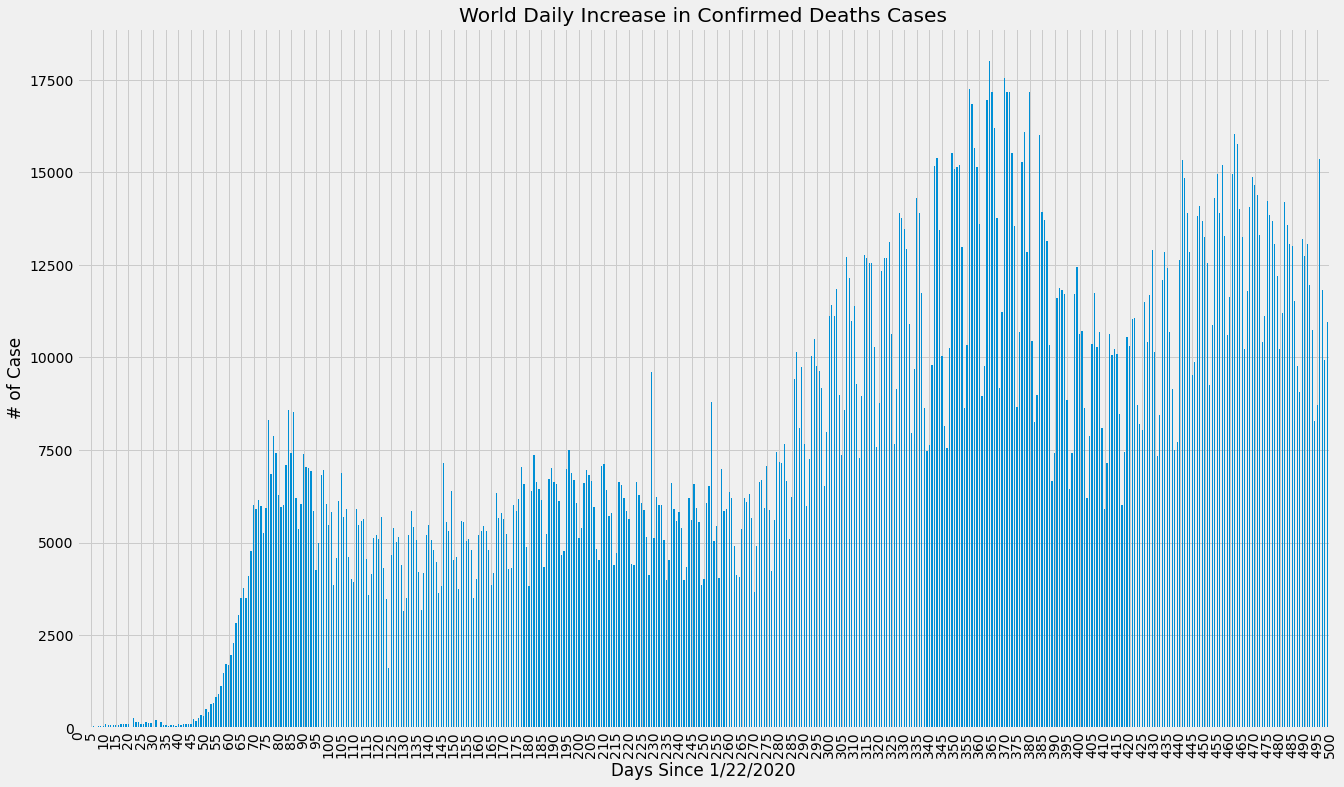

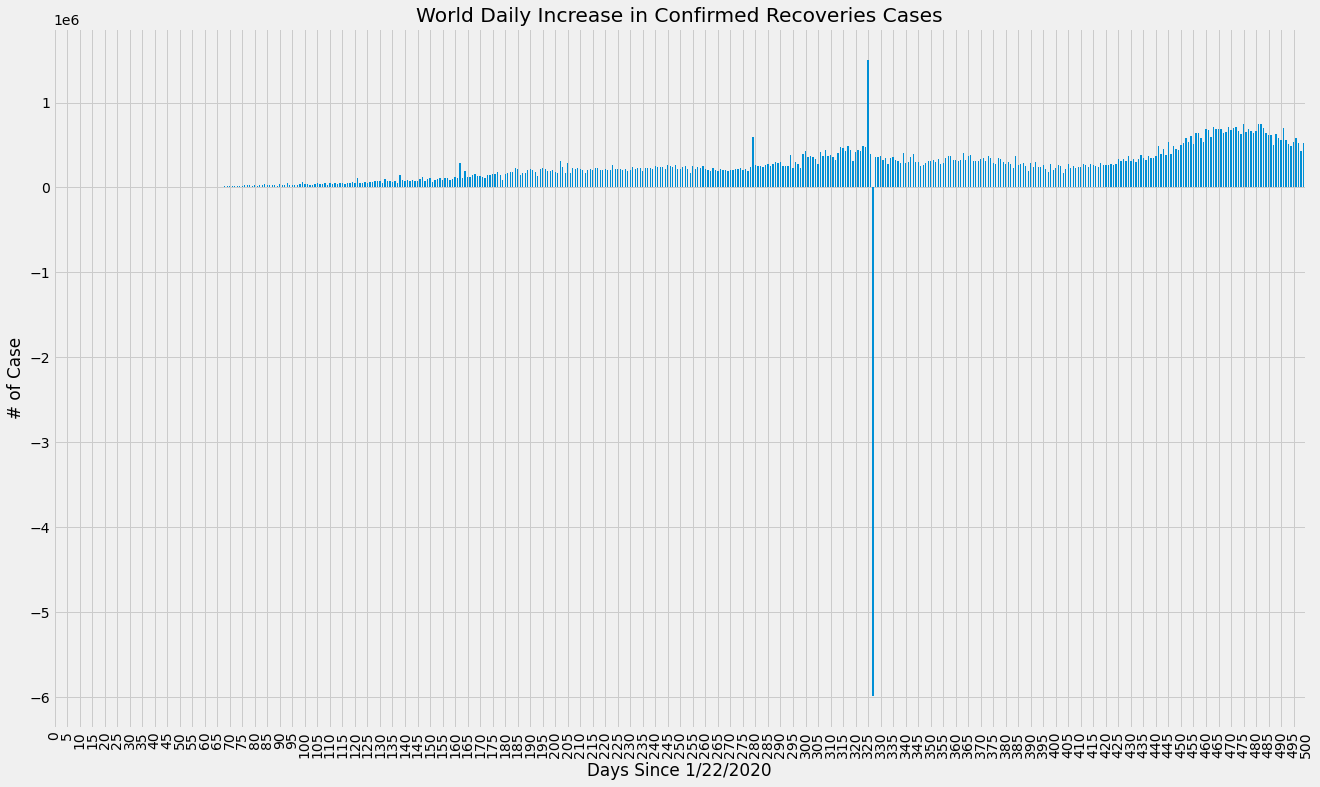

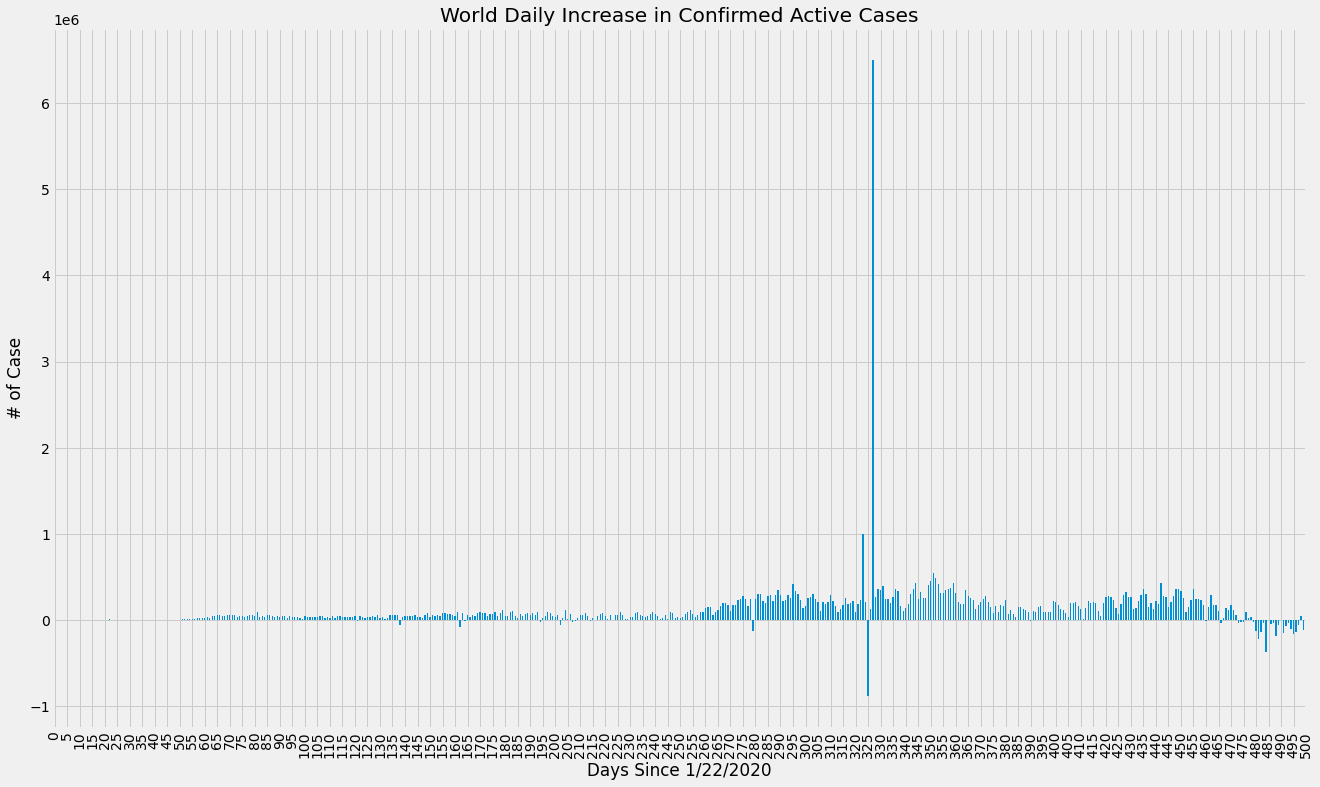

In [105]:
xticks=[5*i for i in range((confirmed_daily.shape[1]//5)+1)]
confirmed_daily.sum(axis=0).plot(kind='bar',figsize=(20,12),xticks=xticks)
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Case')
plt.title('World Daily Increase in Confirmed Cases')
plt.show()

deaths_daily.sum(axis=0).plot(kind='bar',figsize=(20,12),xticks=xticks)
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Case')
plt.title('World Daily Increase in Confirmed Deaths Cases')
plt.show()

recoveries_daily.sum(axis=0).plot(kind='bar',figsize=(20,12),xticks=xticks)
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Case')
plt.title('World Daily Increase in Confirmed Recoveries Cases')
plt.show()

active_daily.sum(axis=0).plot(kind='bar',figsize=(20,12),xticks=xticks)
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Case')
plt.title('World Daily Increase in Confirmed Active Cases')
plt.show()

# Problem 6:
    Calculate the global mortality and recovered rate in percentage by time.

In [36]:
#Insert your code here:
mortality_daily = deaths_daily.sum(axis=0) / confirmed_daily.sum(axis=0)
mortality_daily_rate = mortality_daily*100
mortality_daily_rate

0      3.052065
1      1.020408
2      2.797203
3      3.252033
4      2.043796
         ...   
495    2.299955
496    3.308560
497    2.433270
498    2.026879
499    2.612000
Length: 500, dtype: float64

In [37]:
recovered_rate_daily = recoveries_daily.sum(axis=0) / confirmed_daily.sum(axis=0)
recovered_rate_daily_rate = recovered_rate_daily*100
recovered_rate_daily_rate

0        5.385996
1        2.040816
2        2.447552
3        0.609756
4        2.043796
          ...    
495    139.667755
496    125.891931
497    108.780483
498     87.728550
499    125.192553
Length: 500, dtype: float64

# Problem 7
**7.1** 

    Visualize the mortality rate in by time (day units) using the line chart.

    Using the dashline to visualize the average mortality rate of all the time.

In [38]:
#Insert your code here:


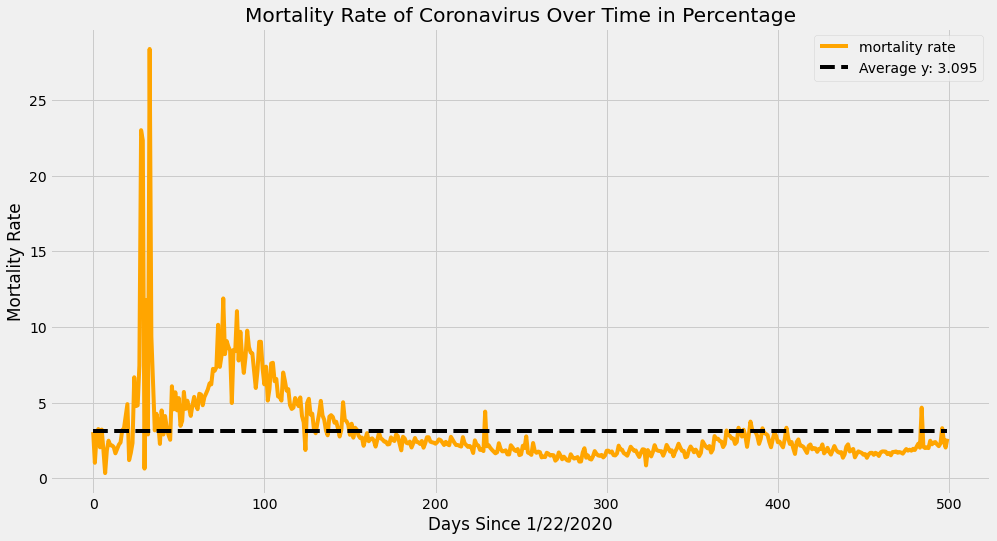

In [39]:
plt.figure(figsize=(15,8))

x=mortality_daily_rate.index
y=mortality_daily_rate.values
y_mean=pd.Series(mortality_daily_rate.mean(),index=list(range(500)))

plt.plot(x,y, label='mortality rate',color='orange')

plt.plot(x,y_mean, label='Average y: {}'.format(round(mortality_daily_rate.mean(),3)),linestyle='--',color='black')

plt.xlabel('Days Since 1/22/2020')
plt.ylabel('Mortality Rate')
plt.title('Mortality Rate of Coronavirus Over Time in Percentage')
plt.legend(loc='best')
plt.show()


**7.2** 

    Visualize the mortality rate in by time (day units) using the line chart.

    Using the dashline to visualize the average mortality rate of all the time.

In [40]:
#Insert your code here:


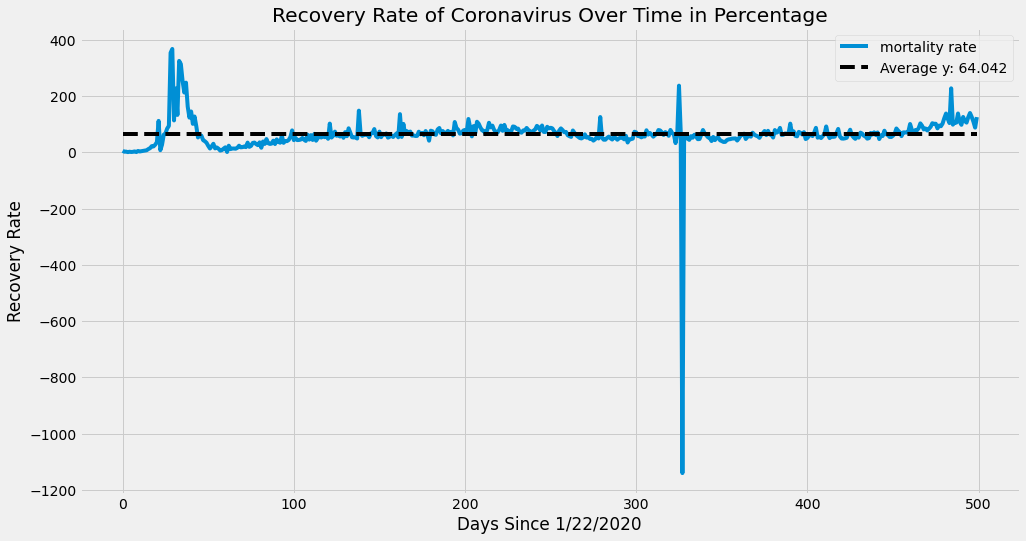

In [41]:
plt.figure(figsize=(15,8))

x=recovered_rate_daily_rate.index
y=recovered_rate_daily_rate.values
y_mean=pd.Series(recovered_rate_daily_rate.mean(),index=list(range(500)))

plt.plot(x,y, label='mortality rate')

plt.plot(x,y_mean, label='Average y: {}'.format(round(recovered_rate_daily_rate.mean(),3)),linestyle='--',color='black')

plt.xlabel('Days Since 1/22/2020')
plt.ylabel('Recovery Rate')
plt.title('Recovery Rate of Coronavirus Over Time in Percentage')
plt.legend(loc='best')
plt.show()

#  5. Continent Analysis

## Data Prerocessing

In [42]:
# Changing the conuntry names as required by pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# getting all countries
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


In [43]:
confirmed_df1.rename(index={'US':'USA',
                            'Korea, South':'South Korea',
                            'Taiwan*':'Taiwan',
                            'Congo (Kinshasa)':'Democratic Republic of the Congo',
                            "Cote d'Ivoire":"Côte d'Ivoire",
                            "Reunion":"Réunion",
                           'Congo (Brazzaville)':'Republic of the Congo',
                           'Bahamas, The':'Bahamas',
                           'Gambia, The':'Gambia'},inplace=True)
deaths_df1.rename(index={'US':'USA',
                            'Korea, South':'South Korea',
                            'Taiwan*':'Taiwan',
                            'Congo (Kinshasa)':'Democratic Republic of the Congo',
                            "Cote d'Ivoire":"Côte d'Ivoire",
                            "Reunion":"Réunion",
                           'Congo (Brazzaville)':'Republic of the Congo',
                           'Bahamas, The':'Bahamas',
                           'Gambia, The':'Gambia'},inplace=True)
recoveries_df1.rename(index={'US':'USA',
                            'Korea, South':'South Korea',
                            'Taiwan*':'Taiwan',
                            'Congo (Kinshasa)':'Democratic Republic of the Congo',
                            "Cote d'Ivoire":"Côte d'Ivoire",
                            "Reunion":"Réunion",
                           'Congo (Brazzaville)':'Republic of the Congo',
                           'Bahamas, The':'Bahamas',
                           'Gambia, The':'Gambia'},inplace=True)
active_df1.rename(index={'US':'USA',
                            'Korea, South':'South Korea',
                            'Taiwan*':'Taiwan',
                            'Congo (Kinshasa)':'Democratic Republic of the Congo',
                            "Cote d'Ivoire":"Côte d'Ivoire",
                            "Reunion":"Réunion",
                           'Congo (Brazzaville)':'Republic of the Congo',
                           'Bahamas, The':'Bahamas',
                           'Gambia, The':'Gambia'},inplace=True)
# getting all countries
countries = np.asarray(confirmed_df1.index)

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'

# Problem 8
    Add the field "continent" into the confirm_df, deaths_df and recorveries_df dataset:

In [44]:
#Insert your code here:


In [45]:
conti_list = [] #list chứa tên continent viết tắt
for c in countries:
    conti_list.append(country_to_continent_code(c))

In [46]:
for i in range(len(conti_list)): #chuyển tên viết tắt thành tên đầy đủ
    for key,value in zip(continents.keys(),continents.values()):
        if conti_list[i] == key:
            conti_list[i] = value
            break

#drop error columns
confirmed_df1.drop(columns='continent',inplace=True)
deaths_df1.drop(columns='continent',inplace=True)
recoveries_df1.drop(columns='continent',inplace=True)
active_df1.drop(columns='continent',inplace=True)

In [47]:
confirmed_df1.insert(0,'continent',conti_list)
deaths_df1.insert(0,'continent',conti_list)
recoveries_df1.insert(0,'continent',conti_list)
active_df1.insert(0,'continent',conti_list)

C:\Users\tocba\anaconda3\envs\data_analytic\lib\site-packages\IPython\core\interactiveshell.py:3361: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



In [48]:
confirmed_df1.head()

continent       Lat       Long  1/22/20  1/23/20  1/24/20  \
Afghanistan      Asia  33.93911  67.709953        0        0        0   
Albania        Europe  41.15330  20.168300        0        0        0   
Algeria        Africa  28.03390   1.659600        0        0        0   
Andorra        Europe  42.50630   1.521800        0        0        0   
Angola         Africa -11.20270  17.873900        0        0        0   

             1/25/20  1/26/20  1/27/20  1/28/20  ...  5/26/21  5/27/21  \
Afghanistan        0        0        0        0  ...    67743    68366   
Albania            0        0        0        0  ...   132244   132264   
Algeria            0        0        0        0  ...   127646   127926   
Andorra            0        0        0        0  ...    13671    13682   
Angola             0        0        0        0  ...    33338    33607   

             5/28/21  5/29/21  5/30/21  5/31/21  6/1/21  6/2/21  6/3/21  \
Afghanistan    69130    70111    70761    71838   72977   74026   75119   
Albania       132285   132297   132309   132315  132337  132351  132360   
Algeria       128198   128456   128725   128913  129218  129640  129976   
Andorra        13693    13693    13693    13727   13729   13744   13752   
Angola         33944    34180    34366    34551   34752   34960   35140   

             6/4/21  
Afghanistan   76628  
Albania      132372  
Algeria      130361  
Andorra       13758  
Angola        35307  

[5 rows x 503 columns]

In [49]:
deaths_df1.head()

continent       Lat       Long  1/22/20  1/23/20  1/24/20  \
Afghanistan      Asia  33.93911  67.709953        0        0        0   
Albania        Europe  41.15330  20.168300        0        0        0   
Algeria        Africa  28.03390   1.659600        0        0        0   
Andorra        Europe  42.50630   1.521800        0        0        0   
Angola         Africa -11.20270  17.873900        0        0        0   

             1/25/20  1/26/20  1/27/20  1/28/20  ...  5/26/21  5/27/21  \
Afghanistan        0        0        0        0  ...     2855     2869   
Albania            0        0        0        0  ...     2447     2447   
Algeria            0        0        0        0  ...     3440     3448   
Andorra            0        0        0        0  ...      127      127   
Angola             0        0        0        0  ...      742      745   

             5/28/21  5/29/21  5/30/21  5/31/21  6/1/21  6/2/21  6/3/21  \
Afghanistan     2881     2899     2919     2944    2973    3007    3034   
Albania         2448     2449     2450     2451    2451    2451    2451   
Algeria         3455     3460     3465     3472    3480    3490    3497   
Andorra          127      127      127      127     127     127     127   
Angola           749      757      764      766     772     780     784   

             6/4/21  
Afghanistan    3068  
Albania        2451  
Algeria        3504  
Andorra         127  
Angola          788  

[5 rows x 503 columns]

In [50]:
recoveries_df1.head()

continent       Lat       Long  1/22/20  1/23/20  1/24/20  \
Afghanistan      Asia  33.93911  67.709953        0        0        0   
Albania        Europe  41.15330  20.168300        0        0        0   
Algeria        Africa  28.03390   1.659600        0        0        0   
Andorra        Europe  42.50630   1.521800        0        0        0   
Angola         Africa -11.20270  17.873900        0        0        0   

             1/25/20  1/26/20  1/27/20  1/28/20  ...  5/26/21  5/27/21  \
Afghanistan        0        0        0        0  ...    56711    56962   
Albania            0        0        0        0  ...   128978   129042   
Algeria            0        0        0        0  ...    88861    89040   
Andorra            0        0        0        0  ...    13381    13405   
Angola             0        0        0        0  ...    27467    27529   

             5/28/21  5/29/21  5/30/21  5/31/21  6/1/21  6/2/21  6/3/21  \
Afghanistan    57119    57281    57450    57629   57741   57963   58070   
Albania       129097   129215   129308   129431  129473  129521  129566   
Algeria        89232    89419    89625    89839   90057   90281   90517   
Andorra        13416    13416    13416    13458   13479   13507   13527   
Angola         27577    27646    27766    28079   28190   28264   28646   

             6/4/21  
Afghanistan   58144  
Albania      129598  
Algeria       90767  
Andorra       13527  
Angola        28802  

[5 rows x 503 columns]

In [51]:
active_df1.head()

continent       Lat       Long  1/22/20  1/23/20  1/24/20  \
Afghanistan      Asia  33.93911  67.709953        0        0        0   
Albania        Europe  41.15330  20.168300        0        0        0   
Algeria        Africa  28.03390   1.659600        0        0        0   
Andorra        Europe  42.50630   1.521800        0        0        0   
Angola         Africa -11.20270  17.873900        0        0        0   

             1/25/20  1/26/20  1/27/20  1/28/20  ...  5/26/21  5/27/21  \
Afghanistan        0        0        0        0  ...     8177     8535   
Albania            0        0        0        0  ...      819      775   
Algeria            0        0        0        0  ...    35345    35438   
Andorra            0        0        0        0  ...      163      150   
Angola             0        0        0        0  ...     5129     5333   

             5/28/21  5/29/21  5/30/21  5/31/21  6/1/21  6/2/21  6/3/21  \
Afghanistan     9130     9931    10392    11265   12263   13056   14015   
Albania          740      633      551      433     413     379     343   
Algeria        35511    35577    35635    35602   35681   35869   35962   
Andorra          150      150      150      142     123     110      98   
Angola          5618     5777     5836     5706    5790    5916    5710   

             6/4/21  
Afghanistan   15416  
Albania         323  
Algeria       36090  
Andorra         104  
Angola         5717  

[5 rows x 503 columns]

# Problem 9
    Create the countries_df data frame with the index as the "Country/Region" field.
    These column infor will be: 
    - continent: Country continent.
    - Deaths: Total number of confirmed.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [52]:
#Insert your code here:


In [53]:
countries_df = pd.DataFrame(index=confirmed_df1.index)

countries_df['Lat'] = confirmed_df1['Lat'].to_list()
countries_df['Long'] = confirmed_df1['Long'].to_list()
countries_df['continent'] = confirmed_df1['continent'].to_list()
countries_df['Confirmed'] = confirmed.sum(axis=1).to_list()
countries_df['Deaths'] = deaths.sum(axis=1).to_list()
countries_df['Recoveries'] = recoveries.sum(axis=1).to_list()
countries_df['Active'] = active.sum(axis=1).to_list()

mortality_rate = round(deaths.sum(axis=1) * 100 / confirmed.sum(axis=1),2)
countries_df['Mortality Rate'] = mortality_rate.to_list()

In [54]:
countries_df.head()

Lat       Long continent  Confirmed  Deaths  Recoveries  \
Afghanistan  33.93911  67.709953      Asia   17467791  687020    13811396   
Albania      41.15330  20.168300    Europe   20562913  390660    14722153   
Algeria      28.03390   1.659600    Africa   28461191  855372    19500385   
Andorra      42.50630   1.521800    Europe    2462205   32862     2243387   
Angola      -11.20270  17.873900    Africa    4973939  121143     3852788   

              Active  Mortality Rate  
Afghanistan  2969375            3.93  
Albania      5450100            1.90  
Algeria      8105434            3.01  
Andorra       185956            1.33  
Angola       1000008            2.44

# Problem 10
    Create the continents_df data frame with the index as the "continent" field.
    These column infor will be: 
    - Confirmed: Country continent.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [55]:
#Insert your code here:


In [56]:
#Insert your code here:
confirmed['continent'] = confirmed_df1['continent']
deaths['continent'] = confirmed_df1['continent']
recoveries['continent'] = confirmed_df1['continent']
active['continent'] = confirmed_df1['continent']

continent_df = pd.DataFrame(index=confirmed.groupby('continent').sum().index)

continent_df['Confirmed'] = confirmed.groupby('continent').sum().iloc[:,-1].to_list()
continent_df['Deaths'] = deaths.groupby('continent').sum().iloc[:,-1].to_list()
continent_df['Recoveries'] = recoveries.groupby('continent').sum().iloc[:,-1].to_list()
continent_df['Active'] = active.groupby('continent').sum().iloc[:,-1].to_list()

mortality_rate = round(deaths.groupby('continent').sum().iloc[:,-1] * 100 / confirmed.groupby('continent').sum().iloc[:,-1],2)
continent_df['Mortality Rate'] = mortality_rate.to_list()
continent_df

Confirmed   Deaths  Recoveries    Active  Mortality Rate
continent                                                              
Africa           4802258   130544     4300361    371353            2.72
Asia            51548502   698311    47874868   2975323            1.35
Australia          49630     1103       41868      6659            2.22
Europe          46913981  1077036    26119357  19717588            2.30
North America    5691718   289151     4767240    635327            5.08
Others            569118     9013      543180     16925            1.58
South America   29425952   910865    26359713   2155374            3.10

## Sample line ploting
Here are the sample functions for visualizing covid cases by time in each continent/country:

In [57]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,3:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,3:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,3:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,3:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,3:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,3:]),axis = 0)[x:]
        
    text = stats[0].columns[3]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df1.columns[3]+" - "+confirmed_df1.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        


# Problem 11
**11.1** 

    Apply the visualize_covid_cases function to show up the Covid visualization of 7 continents in the 7 separated line charts. The order of visualization is sorted in descending order by the number of confirmed. 
    

In [58]:
#Insert your code here:


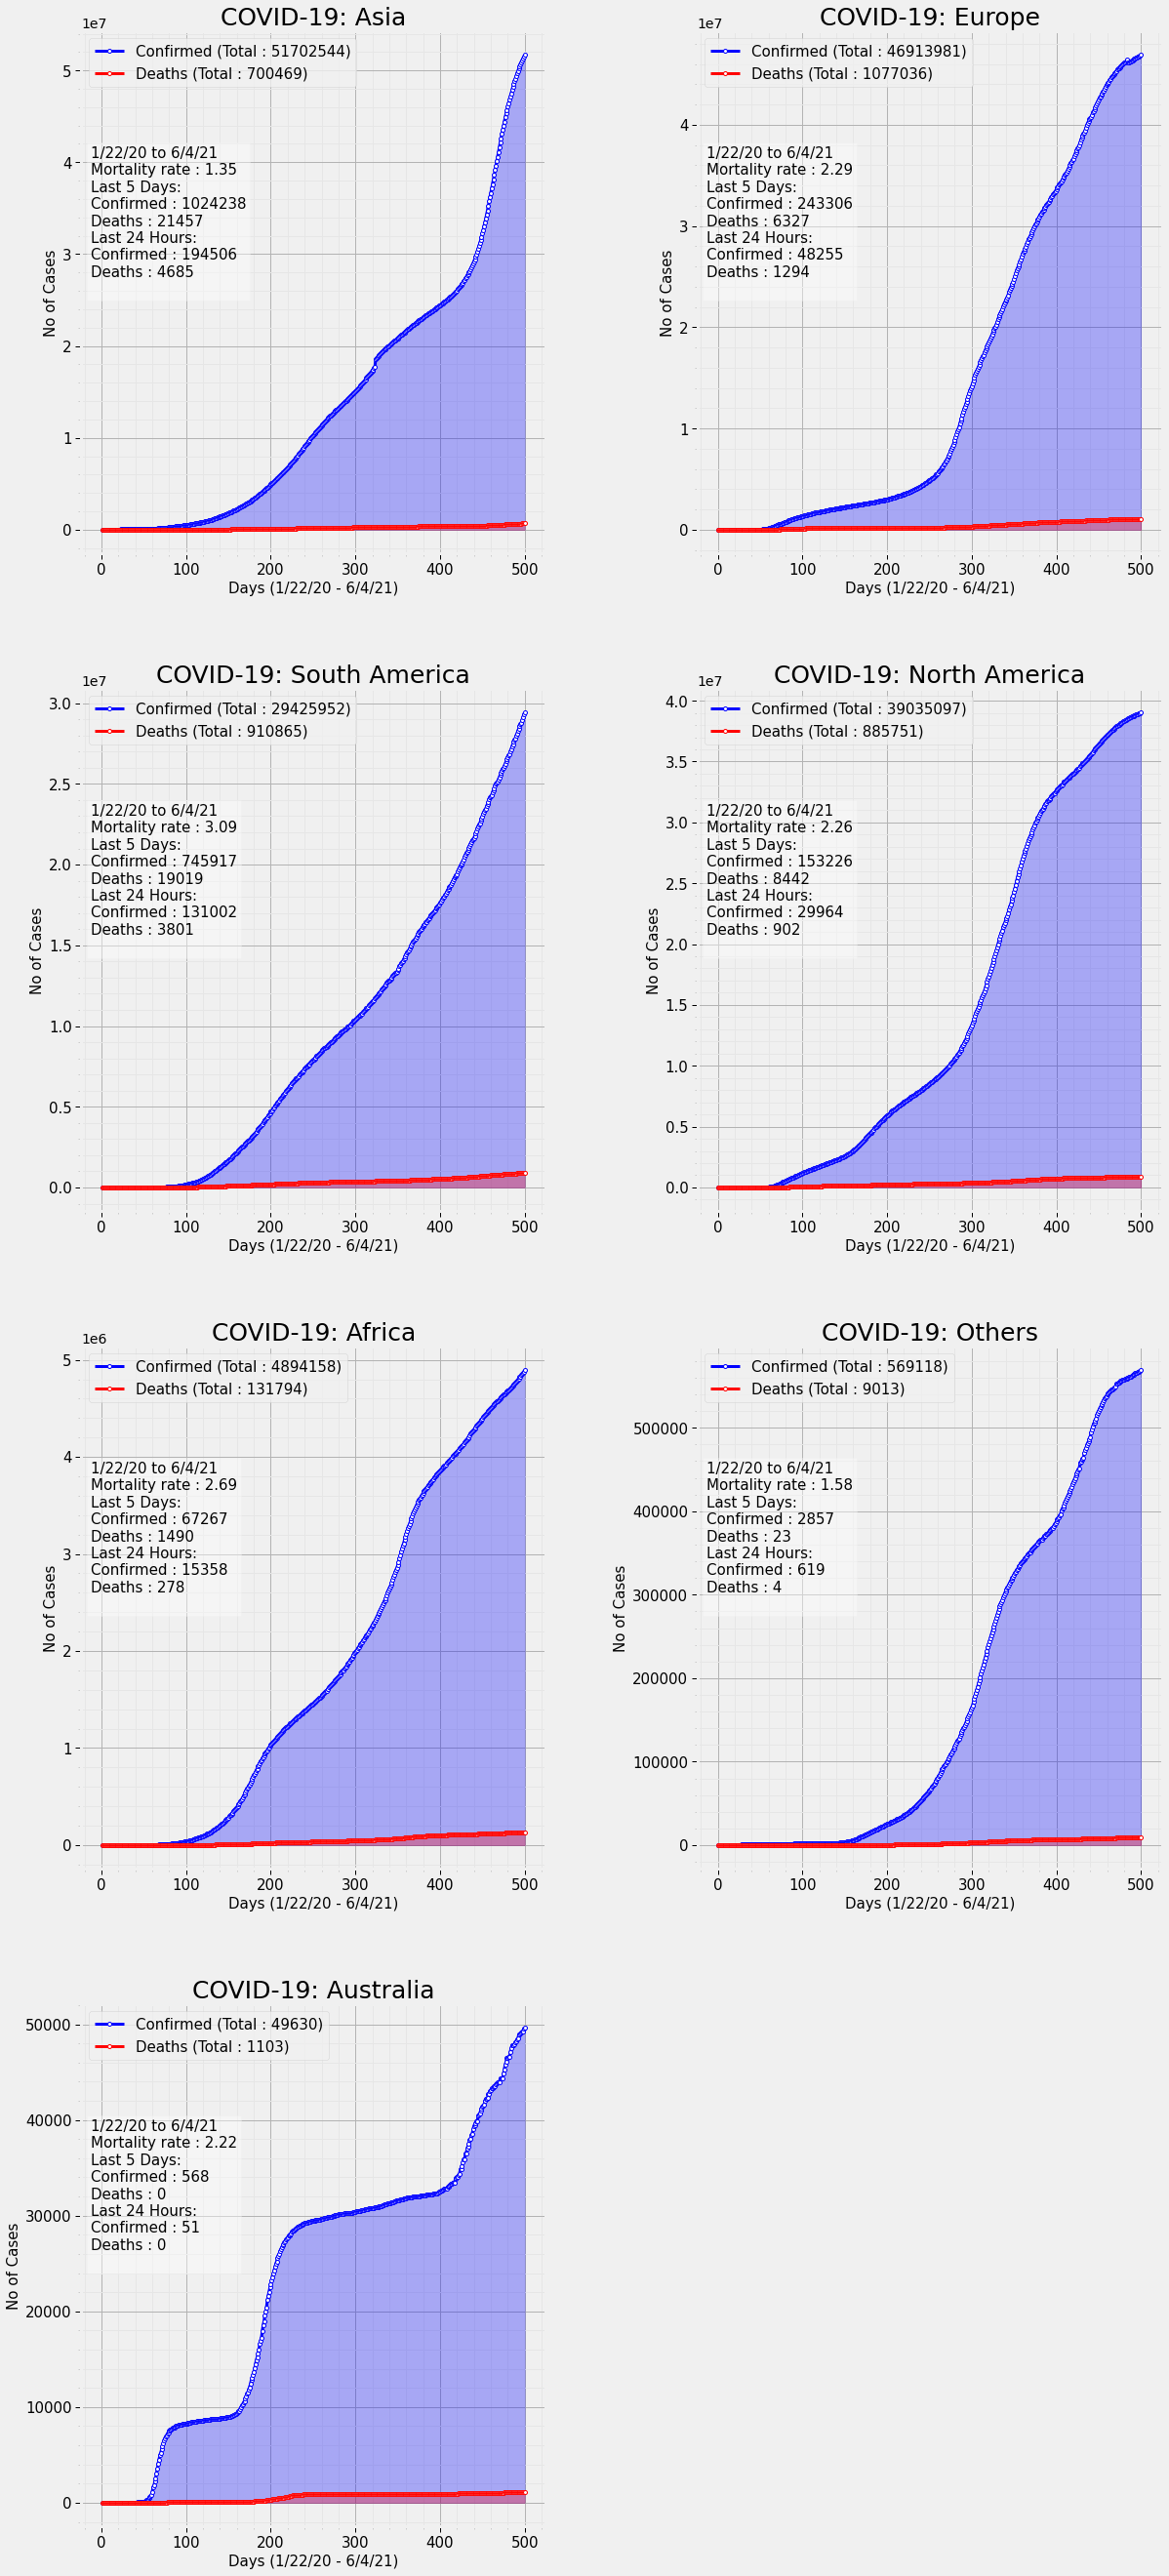

In [59]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(40)
for i, cont in enumerate(continent_df.sort_values(by='Confirmed',ascending=False).index):
    visualize_covid_cases(confirmed_df1,deaths_df1,continent=cont,figure=[fig,4,2,i+1])
plt.show()


**11.2**

    Modify the "plot_params" and "visualize_covid_cases" function to: 
    - Show up the results of the last 7 days instead of 5 days.
    - Add the "Recoveries line" to the main chart.
    - Add the "Total Recoveries" number to the small table.
    - Add the "Recoveries" filed in the last 7 days and 24 hours to the information menu.

In [60]:
#Insert your code here:


In [61]:
def plot_params_112(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases_112(confirmed, deaths, recoveries,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths, recoveries]
    label = ["Confirmed", "Deaths", "Recoveries"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,3:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,3:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,3:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,3:]),axis = 0)[x:]
        Total_recovered = np.sum(np.asarray(stats[2].iloc[:,3:],axis = 0)[x:])
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,3:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,3:]),axis = 0)[x:]
        Total_recovered = np.sum(np.asarray(stats[2][stats[2][params[0]] == params[1]].iloc[:,3:]),axis = 0)[x:]
        
    text = stats[0].columns[3]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 7 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-8])+"\n"
    text += "Recovered : " + str(Total_recovered[-1] - Total_recovered[-8])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-8])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Recovered : " +str(Total_recovered[-1] - Total_recovered[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df1.columns[3]+" - "+confirmed_df1.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params_112(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()


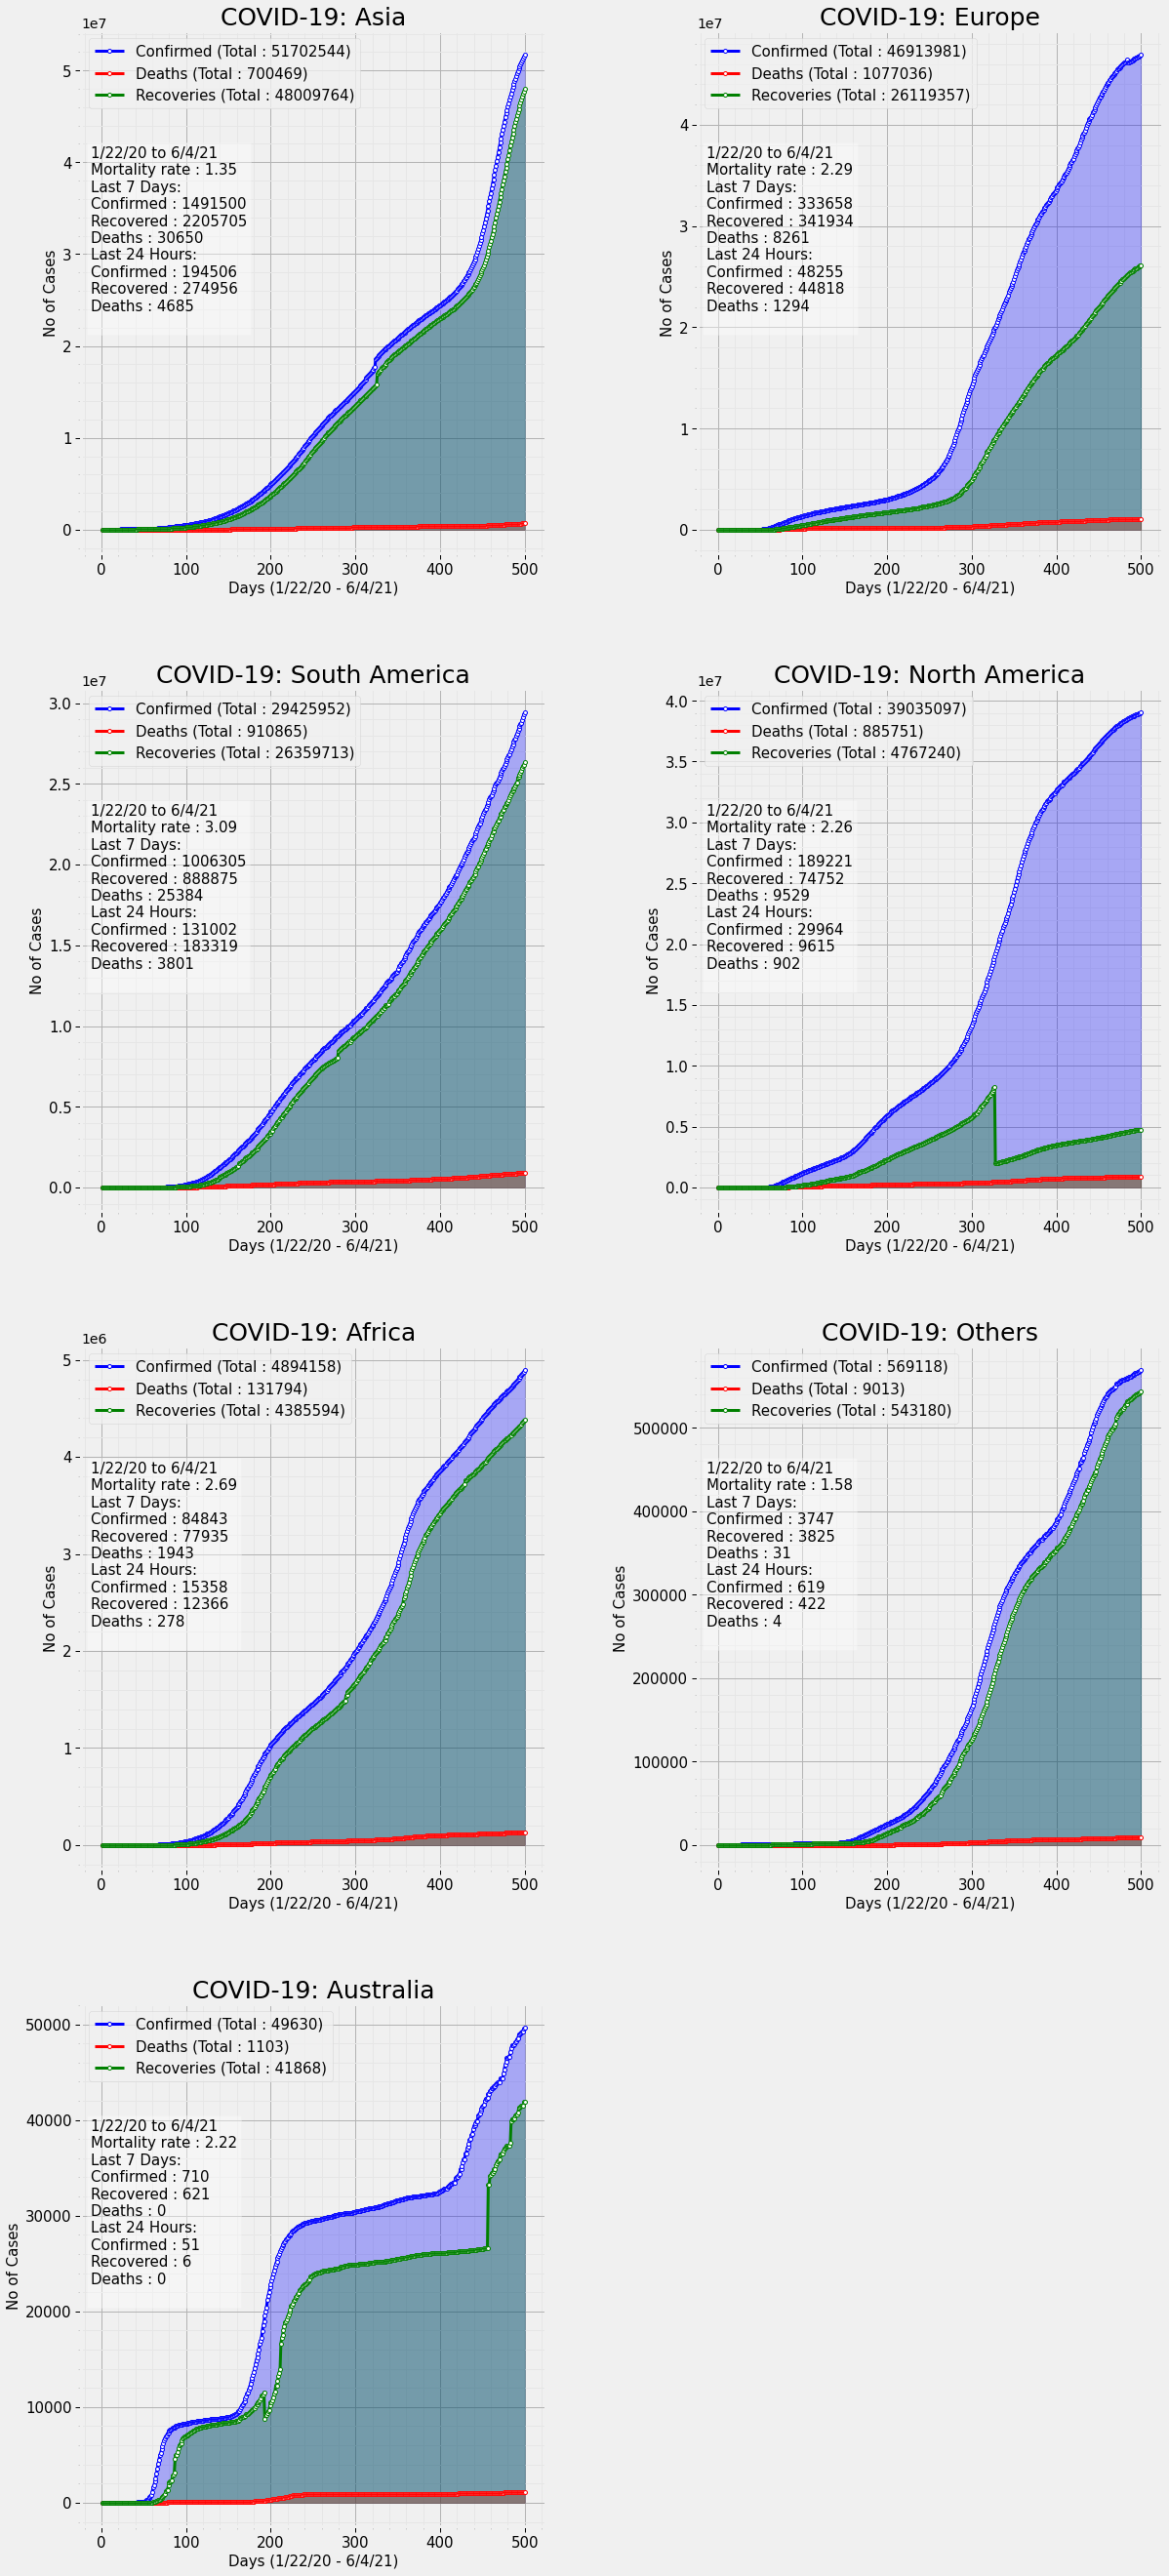

In [62]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(40)
for i, continent in enumerate(continent_df.sort_values(by='Confirmed',ascending=False).index):
    visualize_covid_cases_112(confirmed_df1,deaths_df1,recoveries_df1,continent=continent,figure=[fig,4,2,i+1])
plt.show()

# Problem 12
    Visualize the covariance matrix for continents_df.

In [63]:
#Insert your code here:

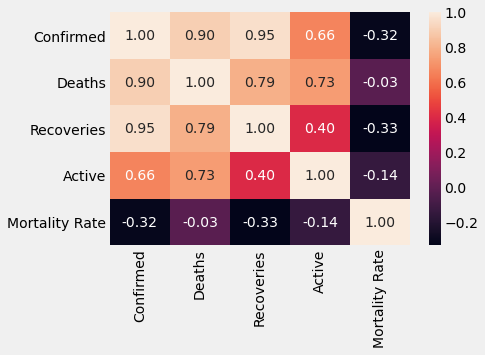

In [64]:
sns.heatmap(continent_df.corr(), annot=True, fmt='.2f')
plt.show()

# Problem 13
    Build the pie chart to compare proportions of the number of confirmed, deaths, recoveries, and active of the 7 continents.
    Each field (confirm, deaths, ...) should be presented in different pie charts.
    You are not allowed to use repeated code snippet here, let try to use a for loop.
    Each continent should be presented in different colors.

In [65]:
#Insert your code here:


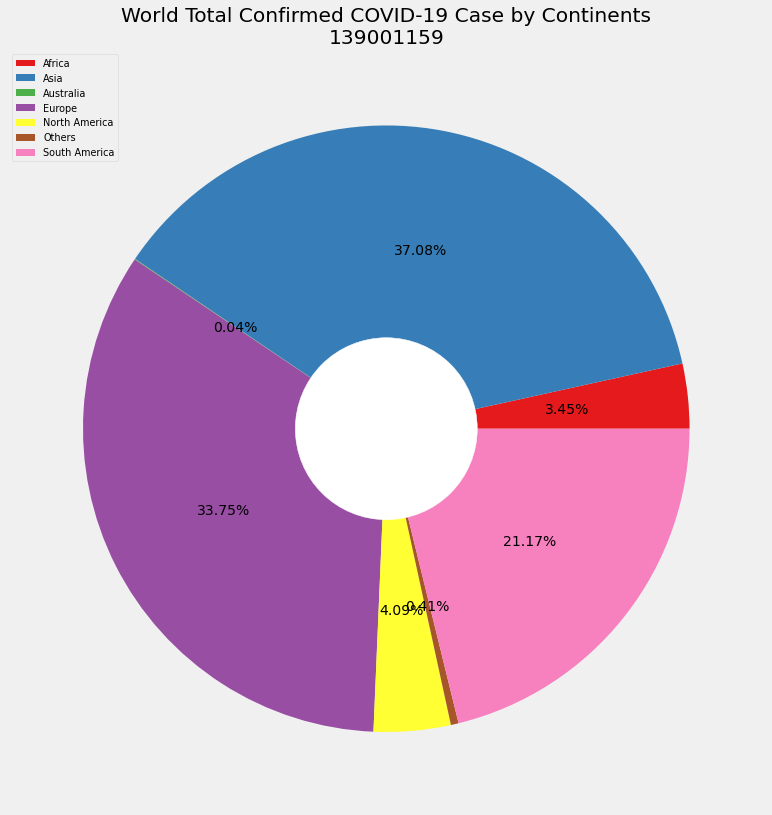

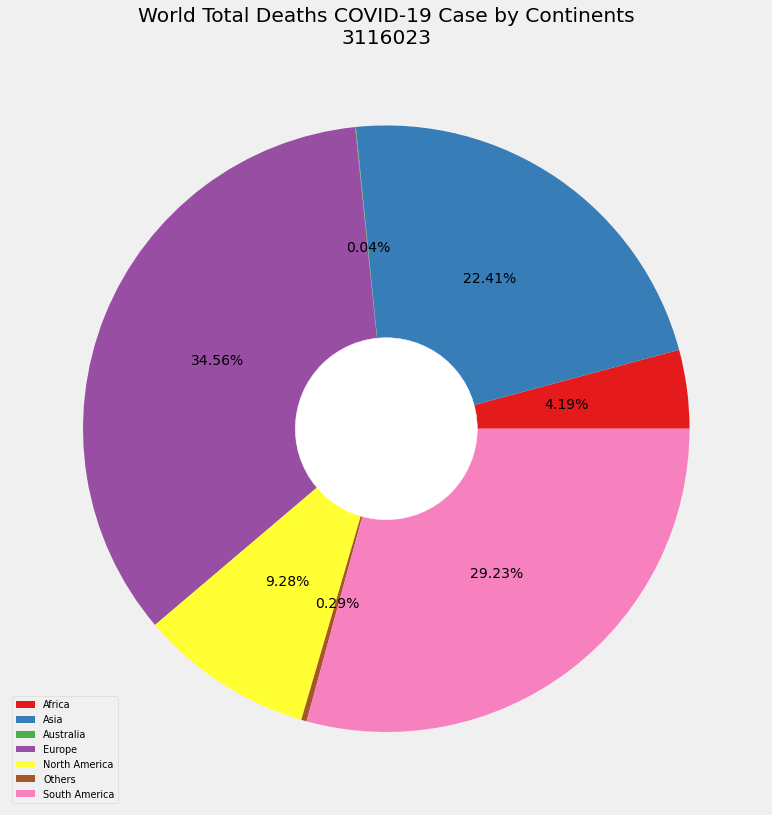

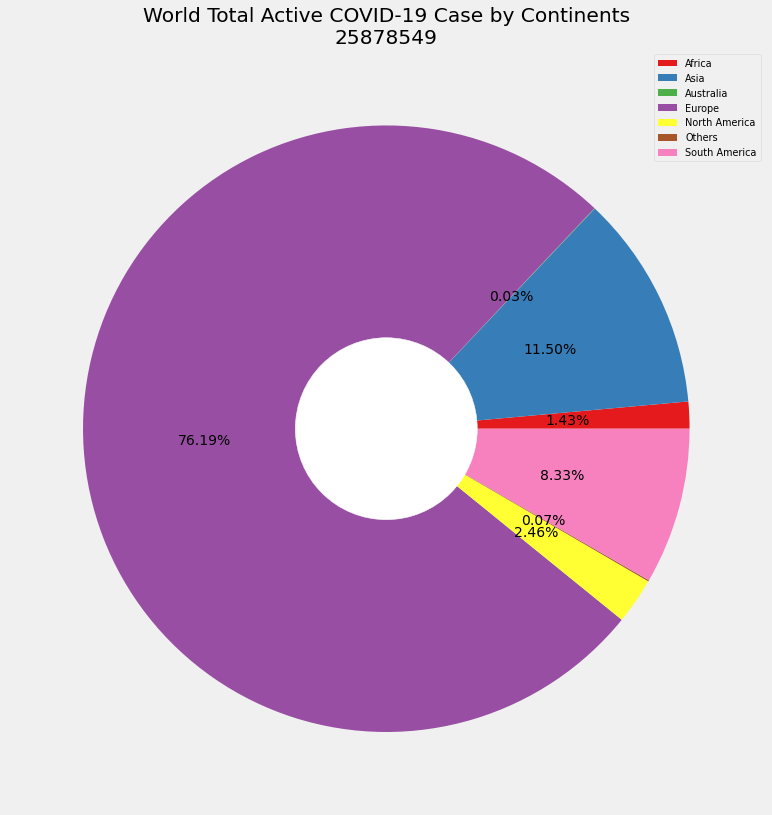

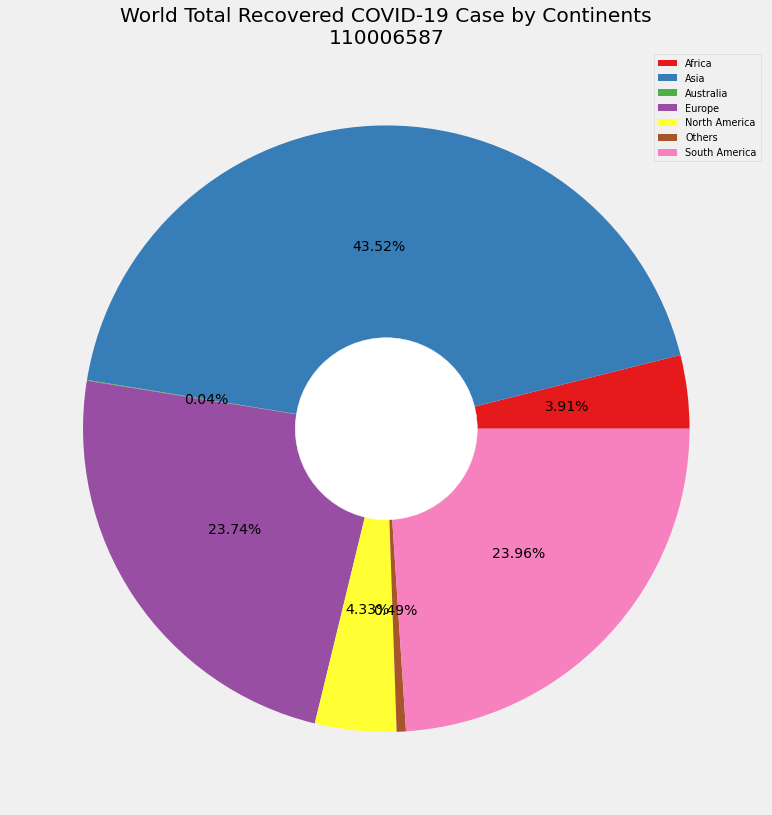

In [66]:
field = [confirmed,deaths,active,recoveries]
name = ['Confirmed','Deaths','Active','Recovered']
color = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ffff33','#a65628','#f781bf']
for f,n in zip(field,name):
    plt.figure(figsize=(13,13))
    plt.pie(f.groupby('continent').sum().iloc[:,-1],colors=color,autopct='%0.2f%%')

    my_circle=plt.Circle( (0,0), 0.3, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)

    plt.legend(labels=f.groupby('continent').sum().index,loc='best',fontsize='x-small')
    plt.title('World Total {} COVID-19 Case by Continents\n'.format(n)+str(f.groupby('continent').sum().iloc[:,-1].sum()))
    plt.show()

# 6. Country analysis

# Problem 14
    Build a folium map to show up the number of confirmed, deaths, recovered and mortality rate of each country based on countries' location. The radius of the cicle is proportional to the number of confirmed.
![title](problem14.png)

In [67]:
#Insert your code here:


In [68]:
m = folium.Map(location=[0,0],zoom_start=2)
for i in range(len(confirmed_df1.index)):
    html="""<center><b>"""+confirmed_df1.index[i]+"""</b></center>
        <ul>
        <li>Confirmed: """+str(confirmed_df1.iloc[i,-1])+"""
        <li>Deaths: """+str(deaths_df1.iloc[i,-1])+"""
        <li>Recovered: """+str(recoveries_df1.iloc[i,-1])+"""
        <li>Mortality Rate: """+str(round((deaths_df1.iloc[i,-1]*100/confirmed_df1.iloc[i,-1]),2))+"""
        </ul>"""
    iframe = folium.IFrame(html,
                       width=200,
                       height=180)
    folium.Circle(
        location=[confirmed_df1.iloc[i,1],confirmed_df1.iloc[i,2]],
        popup=folium.Popup(iframe,
                     max_width=200),
        radius=float(confirmed_df1.iloc[i,-1]/20),
        color='orange',
        fill=True,
        fill_color='orange'
    ).add_to(m)
m

<ipython-input-68-676db4b9e874>:8: RuntimeWarning:

invalid value encountered in longlong_scalars



# Problem 15
Build a px [(plotly.express)](https://plotly.com/python/plotly-express/) map to show up the number of active of each country in log(10) based on countries' name using the "spectral" color.

In [69]:
df = active_df1.iloc[:,-10:]
for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        if df.iloc[i,j] <= 0:
            df.iloc[i,j] = 1
        df.iloc[i,j] = math.log10(df.iloc[i,j])
df['lat']=lat
df['long']=long

In [70]:
df.head()

5/26/21   5/27/21   5/28/21   5/29/21   5/30/21   5/31/21  \
Afghanistan  3.912594  3.931204  3.960471  3.996993  4.016699  4.051731   
Albania      2.913284  2.889302  2.869232  2.801404  2.741152  2.636488   
Algeria      4.548328  4.549469  4.550363  4.551169  4.551877  4.551474   
Andorra      2.212188  2.176091  2.176091  2.176091  2.176091  2.152288   
Angola       3.710033  3.726972  3.749582  3.761702  3.766115  3.756332   

               6/1/21    6/2/21    6/3/21    6/4/21       lat       long  
Afghanistan  4.088597  4.115810  4.146593  4.187972  33.93911  67.709953  
Albania      2.615950  2.578639  2.535294  2.509203  41.15330  20.168300  
Algeria      4.552437  4.554719  4.555844  4.557387  28.03390   1.659600  
Andorra      2.089905  2.041393  1.991226  2.017033  42.50630   1.521800  
Angola       3.762679  3.772028  3.756636  3.757168 -11.20270  17.873900

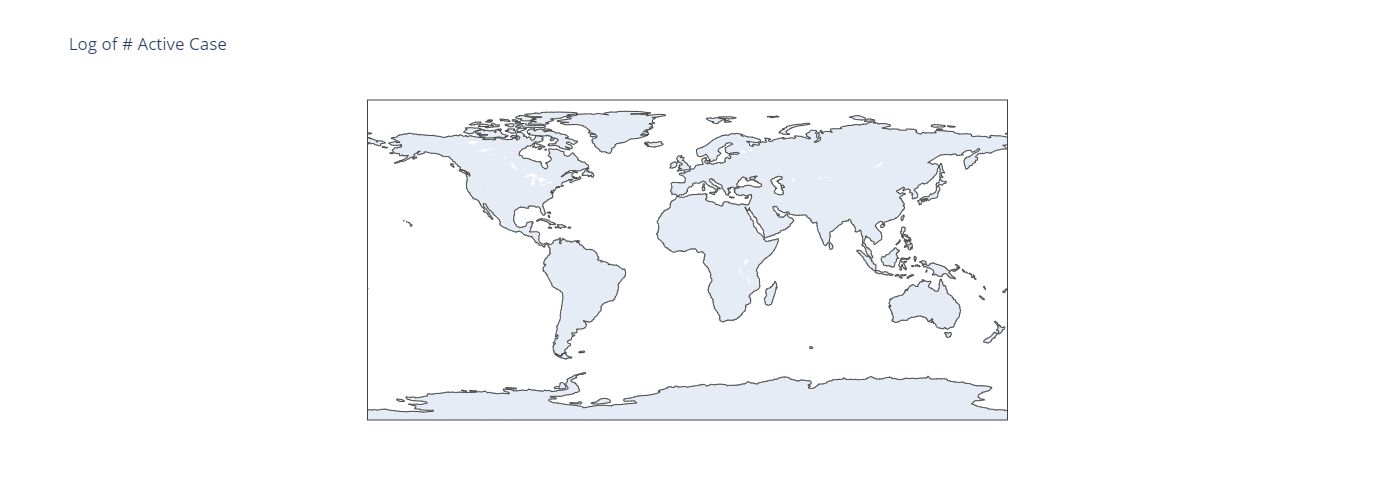

In [71]:
fig = px.choropleth(df, locationmode='country names',
                    color=df['6/4/21'], hover_name=df.index, 
                    color_continuous_scale=px.colors.diverging.Spectral,
                   height=500,title='Log of # Active Case')
fig.show()


# Problem 16
    Filter the top 10 countries based on the number of confirmed cases.

In [72]:
#Insert your code here:

In [73]:
countries_df.sort_values(by='Confirmed',ascending=False).head(10)

Lat        Long      continent   Confirmed     Deaths  \
USA             40.000000 -100.000000  North America  6247999700  127098622   
India           20.593684   78.962880           Asia  3397254364   46447699   
Brazil         -14.235000  -51.925300  South America  2753670624   75422441   
Russia          61.524010  105.318756         Europe   960711606   19083938   
France           3.933900  -53.125800         Europe   889480889   23380172   
United Kingdom  18.220600  -63.068600         Europe   810216001   29697153   
Spain           40.463667   -3.749220         Europe   671103373   19545254   
Italy           41.871940   12.567380         Europe   662027166   26758326   
Turkey          38.963700   35.243300           Asia   650500251    7127372   
Germany         51.165691   10.451526         Europe   546310944   13897107   

                Recoveries      Active  Mortality Rate  
USA              496971828  5623929250            2.03  
India           3058408576   292398089            1.37  
Brazil          2401761573   276486610            2.74  
Russia           818570809   123056859            1.99  
France            71752161   794348556            2.63  
United Kingdom     2420532   778098316            3.67  
Spain             62010895   589547224            2.91  
Italy            511058691   124210149            4.04  
Turkey           594933361    48439518            1.10  
Germany          474457986    57955851            2.54

# Problem 17
    Visualize the top 10 confirmed countries with number active, recoveries and deaths cases using the stacked bar chart.
![title](problem17.png)

In [74]:
#Insert your code here:


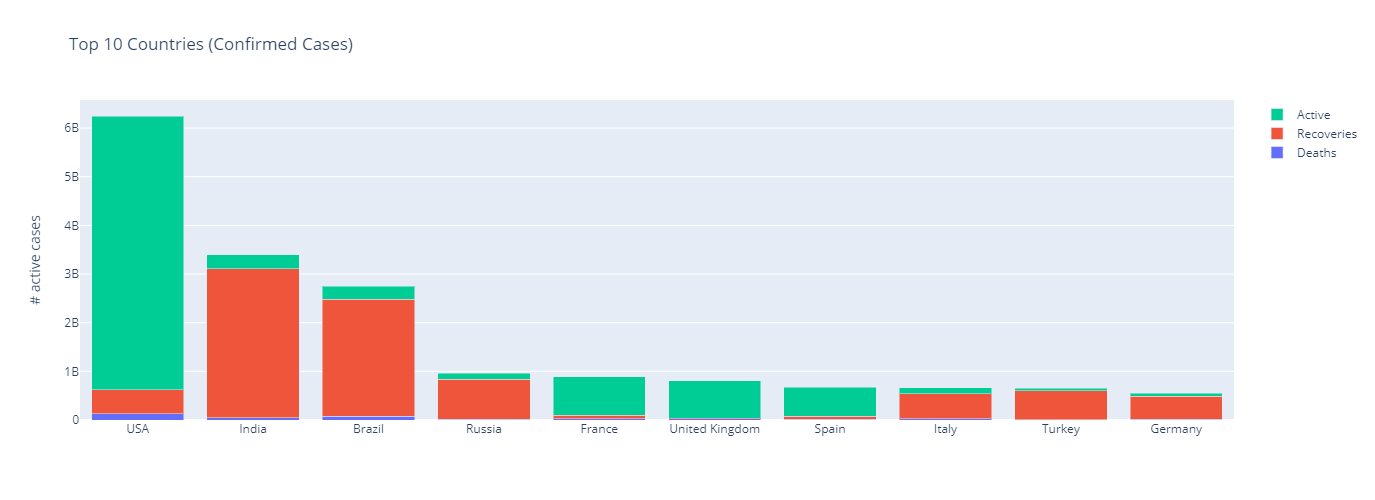

In [75]:
top10_countries = countries_df.sort_values(by='Confirmed',ascending=False).head(10)

fig = go.Figure(data=[
    go.Bar(name='Deaths', x=top10_countries.index, y=top10_countries['Deaths']),
    go.Bar(name='Recoveries', x=top10_countries.index, y=top10_countries['Recoveries']),
    go.Bar(name='Active', x=top10_countries.index, y=top10_countries['Active'])
],
    layout=go.Layout(title='Top 10 Countries (Confirmed Cases)',
                    yaxis_title='# active cases'))
# Change the bar mode
fig.update_layout(barmode='stack',autosize=False,
    width=1300,
    height=500,)
fig.show()

# 7. Advanced Analysis
 

# Problem 18
    Based on the data visualization on global part, does the COVID 2019 epidemic in the world has reached its peak?
    Put your answer here:

Dựa vào số liệu ở mức toàn cầu, em nghĩ dịch COVID-19 chưa đạt đỉnh ở thời điểm phân tích (04 Tháng Sáu 2021)
các đường biểu diễn số lượng ca nhiễm, ca tử vong, ca hồi phục đều có xu hướng tăng lên, riêng biểu đồ của ca đang nhiễm giảm có thể là do vắc-xin, làm giảm số lượng ca nhiễm.

# Problem 19:
Based on the data visualization on the continent part:

    19.1 Which continent has the highest death rate over continents' active cases?

    19.2 Which continent has the highest rate on COVID 2019 spread rate over continents' active cases?
    
    19.3 Which continent has the highest recoveries rate over continents' dataset?

(Note: COVID 2019 Spread rate = Number of new confirmed in the last 10 days / number of active before).
Put your answer here:


In [76]:
continent_df

Confirmed   Deaths  Recoveries    Active  Mortality Rate
continent                                                              
Africa           4802258   130544     4300361    371353            2.72
Asia            51548502   698311    47874868   2975323            1.35
Australia          49630     1103       41868      6659            2.22
Europe          46913981  1077036    26119357  19717588            2.30
North America    5691718   289151     4767240    635327            5.08
Others            569118     9013      543180     16925            1.58
South America   29425952   910865    26359713   2155374            3.10

19.1 Which continent has the highest death rate over continents' active cases?

In [77]:
death_active_rate = continent_df['Deaths'] *100 / continent_df['Active']
death_active_rate.sort_values(ascending=False)

continent
Others           53.252585
North America    45.512154
South America    42.260183
Africa           35.153614
Asia             23.470090
Australia        16.564049
Europe            5.462311
dtype: float64

Khu vực 'Khác' có tỷ lệ số ca tử vong trên số ca đang nhiễm cao nhất (53%)

19.2 Which continent has the highest rate on COVID 2019 spread rate over continents' active cases?

In [78]:
last10day_active_total = active_df1.groupby('continent').sum().iloc[:,-11:]
last10day_active_total

5/25/21   5/26/21   5/27/21   5/28/21   5/29/21   5/30/21  \
continent                                                                   
Africa           358629    364211    368481    371805    374846    375025   
Asia            4001177   3923504   3850012   3737166   3613751   3514411   
Australia          6592      6755      6678      6570      6574      6616   
Europe         19747769  19740687  19736409  19734125  19731345  19731008   
North America  33209519  33228485  33254358  33277166  33289567  33293858   
Others            17388     17328     17199     17034     17052     16760   
South America   2088300   2148595   2040717   2063328   2136931   2125552   

                5/31/21    6/1/21    6/2/21    6/3/21    6/4/21  
continent                                                        
Africa           373550    366900    371548    374056    376770  
Asia            3372397   3257099   3163299   3077446   2992311  
Australia          6593      6625      6656      6614      6659  
Europe         19722776  19711744  19696371  19715445  19717588  
North America  33299126  33322227  33340760  33362659  33382106  
Others            16800     16960     16760     16732     16925  
South America   2112982   2087238   2118931   2211492   2155374

In [79]:
spread_rate = (last10day_active_total.iloc[:,-1] - last10day_active_total.iloc[:,1]) *100 /  last10day_active_total.iloc[:,0]
spread_rate.sort_values(ascending=False)

continent
Africa            3.501948
North America     0.462581
South America     0.324618
Europe           -0.116970
Australia        -1.456311
Others           -2.317690
Asia            -23.272977
dtype: float64

Châu Phi có tỷ lệ lây nhiễm COVID-19 cao nhất (3.5%)

19.3 Which continent has the highest recoveries rate over continents' dataset?

In [80]:
recovery_rate = continent_df['Recoveries']*100/continent_df['Confirmed']
recovery_rate.sort_values(ascending=False)

continent
Others           95.442421
Asia             92.873442
South America    89.579814
Africa           89.548729
Australia        84.360266
North America    83.757488
Europe           55.674996
dtype: float64

Khu vực Khác có tỷ lệ hồi phục cao nhất (95%)

# Problem 20
Based on the data visualization on the country part:

    20.1 Which country has the highest death rate over countries' dataset?

    20.2 Which country has the highest rate on COVID 2019 spread rate over countries'dataset?
    
    20.3 Which country has the highest recoveries rate over countries' dataset?
Put your answer here:

In [81]:
countries_df

Lat        Long continent  Confirmed  Deaths  \
Afghanistan         33.939110   67.709953      Asia   17467791  687020   
Albania             41.153300   20.168300    Europe   20562913  390660   
Algeria             28.033900    1.659600    Africa   28461191  855372   
Andorra             42.506300    1.521800    Europe    2462205   32862   
Angola             -11.202700   17.873900    Africa    4973939  121143   
...                       ...         ...       ...        ...     ...   
Vietnam             14.058324  108.277199      Asia     662445   10511   
West Bank and Gaza  31.952200   35.233200    Others   43672082  461390   
Yemen               15.552727   48.516388      Asia    1002595  245549   
Zambia             -13.133897   27.849332    Africa   14072414  213700   
Zimbabwe           -19.015438   29.154857    Africa    6718751  246829   

                    Recoveries   Active  Mortality Rate  
Afghanistan           13811396  2969375            3.93  
Albania               14722153  5450100            1.90  
Algeria               19500385  8105434            3.01  
Andorra                2243387   185956            1.33  
Angola                 3852788  1000008            2.44  
...                        ...      ...             ...  
Vietnam                 504804   147130            1.59  
West Bank and Gaza    38809736  4400956            1.06  
Yemen                   527334   229712           24.49  
Zambia                13178315   680399            1.52  
Zimbabwe               5814727   657195            3.67  

[195 rows x 8 columns]

20.1 Which country has the highest death rate over countries' dataset?

In [82]:
death_active_rate = countries_df['Deaths']*100/countries_df['Active']
death_active_rate.sort_values(ascending=False)

Peru                     2792.067050
China                     107.335098
Yemen                     106.894285
Mexico                     77.467535
Chad                       59.819241
                            ...     
Dominica                    0.000000
Saint Kitts and Nevis       0.000000
Kiribati                    0.000000
Palau                            NaN
Summer Olympics 2020             NaN
Length: 195, dtype: float64

Peru là nước có tỷ lệ tử vong trên số ca đang nhiễm cao nhất thế giới với 2792%

20.2 Which country has the highest rate on COVID 2019 spread rate over countries'dataset?

In [83]:
last10day_active_total = active_df1.iloc[:,-11:]
spread_rate = (last10day_active_total.iloc[:,-1] - last10day_active_total.iloc[:,1]) *100 /  last10day_active_total.iloc[:,0]
spread_rate.sort_values(ascending=False)

Uganda                  746.349206
Zambia                  368.589744
Fiji                    232.407407
Eritrea                 171.351351
Liberia                 127.659574
                           ...    
Samoa                          NaN
Solomon Islands                NaN
Summer Olympics 2020           NaN
Tajikistan                     NaN
Vanuatu                        NaN
Length: 195, dtype: float64

Uganda là nước có tỷ lệ lây nhiễm cao nhất thế giới với 746%

20.3 Which country has the highest recoveries rate over countries' dataset?

In [84]:
recovery_rate = countries_df['Recoveries']*100/countries_df['Confirmed']
recovery_rate.sort_values(ascending=False)

Uzbekistan              94.751644
Ghana                   94.332282
Micronesia              94.074074
Iceland                 93.857311
Singapore               93.846765
                          ...    
United Kingdom           0.298751
Kiribati                 0.000000
Sweden                   0.000000
Palau                         NaN
Summer Olympics 2020          NaN
Length: 195, dtype: float64

Uzbekistan là nước có tỷ lệ hồi phục cao nhất với xấp xỉ 95%

# Problem 21
**USA dataset**

In [85]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')

In [86]:
us_medical_data.head()

Province_State Country_Region          Last_Update      Lat     Long_  \
0         Alabama             US  2020-07-07 04:34:13  32.3182  -86.9023   
1          Alaska             US  2020-07-07 04:34:13  61.3707 -152.4044   
2  American Samoa             US  2020-07-07 04:34:13 -14.2710 -170.1320   
3         Arizona             US  2020-07-07 04:34:13  33.7298 -111.4312   
4        Arkansas             US  2020-07-07 04:34:13  34.9697  -92.3731   

   Confirmed  Deaths  Recovered   Active  FIPS  Incident_Rate  People_Tested  \
0      44932    1007    22082.0  21789.0     1     915.282617       455095.0   
1       1184      16      548.0    598.0     2     158.841903       123753.0   
2          0       0        NaN      0.0    60       0.000000          696.0   
3     101455    1829    11836.0  87790.0     4    1393.858286       873294.0   
4      24253     292    17834.0   6127.0     5     803.663856       344968.0   

   People_Hospitalized  Mortality_Rate       UID ISO3  Testing_Rate  \
0               2914.0        2.243861  84000001  USA   9281.620008   
1                  NaN        1.376936  84000002  USA  16916.662680   
2                  NaN             NaN        16  ASM   1250.876152   
3               5188.0        1.802770  84000004  USA   8488.322873   
4               1575.0        1.203975  84000005  USA  11431.093603   

   Hospitalization_Rate  
0              6.493159  
1                   NaN  
2                   NaN  
3              5.113597  
4              6.494042

In [87]:
us_medical_data.set_index('Province_State',inplace=True)
us_medical_data.index.name=None
us_medical_data.head()

Country_Region          Last_Update      Lat     Long_  \
Alabama                    US  2020-07-07 04:34:13  32.3182  -86.9023   
Alaska                     US  2020-07-07 04:34:13  61.3707 -152.4044   
American Samoa             US  2020-07-07 04:34:13 -14.2710 -170.1320   
Arizona                    US  2020-07-07 04:34:13  33.7298 -111.4312   
Arkansas                   US  2020-07-07 04:34:13  34.9697  -92.3731   

                Confirmed  Deaths  Recovered   Active  FIPS  Incident_Rate  \
Alabama             44932    1007    22082.0  21789.0     1     915.282617   
Alaska               1184      16      548.0    598.0     2     158.841903   
American Samoa          0       0        NaN      0.0    60       0.000000   
Arizona            101455    1829    11836.0  87790.0     4    1393.858286   
Arkansas            24253     292    17834.0   6127.0     5     803.663856   

                People_Tested  People_Hospitalized  Mortality_Rate       UID  \
Alabama              455095.0               2914.0        2.243861  84000001   
Alaska               123753.0                  NaN        1.376936  84000002   
American Samoa          696.0                  NaN             NaN        16   
Arizona              873294.0               5188.0        1.802770  84000004   
Arkansas             344968.0               1575.0        1.203975  84000005   

               ISO3  Testing_Rate  Hospitalization_Rate  
Alabama         USA   9281.620008              6.493159  
Alaska          USA  16916.662680                   NaN  
American Samoa  ASM   1250.876152                   NaN  
Arizona         USA   8488.322873              5.113597  
Arkansas        USA  11431.093603              6.494042

##### Based on the USA data:

    21.1 Which state has the highest death rate over states' dataset?

    21.2 Which state has the highest rate on COVID 2019 spread rate over states' dataset?
    
    21.3 Which state has the highest recoveries rate over states' dataset?

21.1 Which state has the highest death rate over states' dataset?

In [88]:
us_death_rate = us_medical_data['Deaths']*100/us_medical_data['Active']
us_death_rate.sort_values(ascending=False).head()

Massachusetts    93.350034
Minnesota        47.953031
New Hampshire    45.047170
Michigan         43.794439
Pennsylvania     37.757552
dtype: float64

Bang Massachusetts là bang có tỷ lệ tử vong cao nhất nước Mỹ với hơn 93%

21.2 Which state has the highest rate on COVID 2019 spread rate over states' dataset?

In [89]:
#lấy dữ liệu ngày 5 tháng 7 năm 2020 để tính tỷ lệ lây nhiễm
us_medical_data_b= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-05-2020.csv')
us_medical_data_b.set_index('Province_State',inplace=True)
us_medical_data_b.index.name=None
us_medical_data_b.head()

Country_Region          Last_Update      Lat     Long_  \
Alabama                    US  2020-07-06 04:34:10  32.3182  -86.9023   
Alaska                     US  2020-07-06 04:34:10  61.3707 -152.4044   
American Samoa             US  2020-07-06 04:34:10 -14.2710 -170.1320   
Arizona                    US  2020-07-06 04:34:10  33.7298 -111.4312   
Arkansas                   US  2020-07-06 04:34:10  34.9697  -92.3731   

                Confirmed  Deaths  Recovered   Active  FIPS  Incident_Rate  \
Alabama             44022    1007    22082.0  20864.0     1     896.417329   
Alaska               1155      16      544.0    574.0     2     155.014387   
American Samoa          0       0        NaN      0.0    60       0.000000   
Arizona             98103    1825    11361.0  84917.0     4    1347.806214   
Arkansas            23814     287    16726.0   6801.0     5     789.116855   

                People_Tested  People_Hospitalized  Mortality_Rate       UID  \
Alabama              449886.0               2909.0        2.291084  84000001   
Alaska               122732.0                  NaN        1.410935  84000002   
American Samoa          696.0                  NaN             NaN        16   
Arizona              864800.0               5161.0        1.860290  84000004   
Arkansas             338893.0               1536.0        1.205173  84000005   

               ISO3  Testing_Rate  Hospitalization_Rate  
Alabama         USA   9175.382940              6.618433  
Alaska          USA  16777.095052                   NaN  
American Samoa  ASM   1250.876152                   NaN  
Arizona         USA   8303.139138              5.260797  
Arkansas        USA  11229.788283              6.449987

In [90]:
us_spread_rate = (us_medical_data['Active'] - us_medical_data_b['Active']) *100 /  us_medical_data_b['Active']
us_spread_rate.sort_values(ascending=False).head()

Guam             21.875000
West Virginia    10.977242
Wyoming           9.276018
Puerto Rico       8.620023
Texas             8.442943
Name: Active, dtype: float64

Bang Guam là bang có tỷ lệ lây nhiễm cao nhất nước Mỹ với 21.87%

21.3 Which state has the highest recoveries rate over states' dataset?

In [91]:
us_recovery_rate = us_medical_data['Recovered'] *100/ us_medical_data['Confirmed']
us_recovery_rate.sort_values(ascending=False).head()

Minnesota        87.912572
North Dakota     87.035594
South Dakota     85.334272
Massachusetts    84.582838
Vermont          81.694644
dtype: float64

Bang Minnesota có tỷ lệ hồi phục COVID-19 cao nhất cả nước với 88%

In [92]:
#Insert your code here:

# Problem 22
Build a regression model (or more than 1 model) to predict the number of new confirmed in the top 10 states which have the highest number of confirmed cases in the USA.

In [93]:
#Insert your code here:

In [94]:
data = us_medical_data.sort_values(by='Confirmed',ascending=False).dropna()
data.head()

Country_Region          Last_Update      Lat     Long_  \
New York                  US  2020-07-07 04:34:13  42.1657  -74.9481   
New Jersey                US  2020-07-07 04:34:13  40.2989  -74.5210   
Massachusetts             US  2020-07-07 04:34:13  42.2302  -71.5301   
Arizona                   US  2020-07-07 04:34:13  33.7298 -111.4312   
Maryland                  US  2020-07-07 04:34:13  39.0639  -76.8021   

               Confirmed  Deaths  Recovered    Active  FIPS  Incident_Rate  \
New York          397649   32057    71040.0  294390.0    36    2044.093624   
New Jersey        174766   15229    30729.0  127653.0    34    1954.596783   
Massachusetts     110137    8198    93157.0    8782.0    25    1597.924586   
Arizona           101455    1829    11836.0   87790.0     4    1393.858286   
Maryland           69904    3246     5029.0   61629.0    24    1156.263646   

               People_Tested  People_Hospitalized  Mortality_Rate       UID  \
New York           4288131.0              89995.0        8.102372  84000036   
New Jersey         1549209.0              20237.0        8.771910  84000034   
Massachusetts       899417.0              11469.0        7.443457  84000025   
Arizona             873294.0               5188.0        1.802770  84000004   
Maryland            587361.0              11096.0        4.643511  84000024   

              ISO3  Testing_Rate  Hospitalization_Rate  
New York       USA  22042.910293             22.631768  
New Jersey     USA  17441.745786             11.656519  
Massachusetts  USA  13049.207233             10.413394  
Arizona        USA   8488.322873              5.113597  
Maryland       USA   9715.383547             15.873198

Field description
- Province_State - The name of the State within the USA.
- Country_Region - The name of the Country (US).
- Last_Update - The most recent date the file was pushed.
- Lat - Latitude.
- Long_ - Longitude.
- Confirmed - Aggregated case count for the state.
- Deaths - Aggregated death toll for the state.
- Recovered - Aggregated Recovered case count for the state.
- Active - Aggregated confirmed cases that have not been resolved (Active cases = total cases - total recovered - total deaths).
- FIPS - Federal Information Processing Standards code that uniquely identifies counties within the USA.
- Incident_Rate - cases per 100,000 persons.
- Total_Test_Results - Total number of people who have been tested.
- People_Hospitalized - Total number of people hospitalized. (Nullified on Aug 31, see Issue #3083)
- Case_Fatality_Ratio - Number recorded deaths * 100/ Number confirmed cases.
- UID - Unique Identifier for each row entry.
- ISO3 - Officialy assigned country code identifiers.
- Testing_Rate - Total test results per 100,000 persons. The "total test results" are equal to "Total test results (Positive + Negative)" from COVID Tracking Project.
- Hospitalization_Rate - US Hospitalization Rate (%): = Total number hospitalized / Number cases. The "Total number hospitalized" is the "Hospitalized – Cumulative" count from COVID Tracking Project. 
- The "hospitalization rate" and "Total number hospitalized" is only presented for those states which provide cumulative hospital data. (Nullified on Aug 31, see Issue #3083)

In [95]:
data.drop(columns=['Country_Region','Last_Update','Lat','Long_','ISO3','UID','Mortality_Rate', 'FIPS'],inplace=True)
data.head()

Confirmed  Deaths  Recovered    Active  Incident_Rate  \
New York          397649   32057    71040.0  294390.0    2044.093624   
New Jersey        174766   15229    30729.0  127653.0    1954.596783   
Massachusetts     110137    8198    93157.0    8782.0    1597.924586   
Arizona           101455    1829    11836.0   87790.0    1393.858286   
Maryland           69904    3246     5029.0   61629.0    1156.263646   

               People_Tested  People_Hospitalized  Testing_Rate  \
New York           4288131.0              89995.0  22042.910293   
New Jersey         1549209.0              20237.0  17441.745786   
Massachusetts       899417.0              11469.0  13049.207233   
Arizona             873294.0               5188.0   8488.322873   
Maryland            587361.0              11096.0   9715.383547   

               Hospitalization_Rate  
New York                  22.631768  
New Jersey                11.656519  
Massachusetts             10.413394  
Arizona                    5.113597  
Maryland                  15.873198

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, New York to Hawaii
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Confirmed             33 non-null     int64  
 1   Deaths                33 non-null     int64  
 2   Recovered             33 non-null     float64
 3   Active                33 non-null     float64
 4   Incident_Rate         33 non-null     float64
 5   People_Tested         33 non-null     float64
 6   People_Hospitalized   33 non-null     float64
 7   Testing_Rate          33 non-null     float64
 8   Hospitalization_Rate  33 non-null     float64
dtypes: float64(7), int64(2)
memory usage: 2.6+ KB


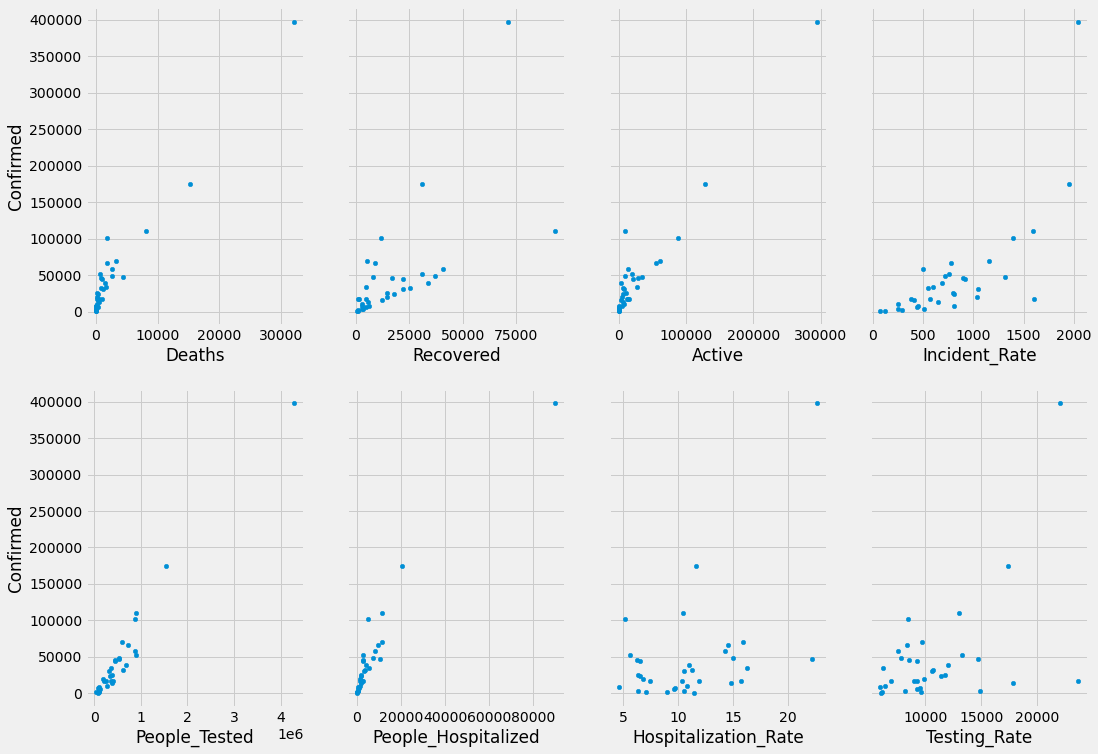

In [97]:
fig, axs = plt.subplots(2, 4, sharey=True)
data.plot(kind='scatter', x='Deaths', y='Confirmed', ax=axs[0][0], figsize=(16, 12))
data.plot(kind='scatter', x='Recovered', y='Confirmed', ax=axs[0][1])
data.plot(kind='scatter', x='Active', y='Confirmed', ax=axs[0][2])
data.plot(kind='scatter', x='Incident_Rate', y='Confirmed', ax=axs[0][3])
data.plot(kind='scatter', x='People_Tested', y='Confirmed', ax=axs[1][0])
data.plot(kind='scatter', x='People_Hospitalized', y='Confirmed', ax=axs[1][1])
data.plot(kind='scatter', x='Hospitalization_Rate', y='Confirmed', ax=axs[1][2])
data.plot(kind='scatter', x='Testing_Rate', y='Confirmed', ax=axs[1][3])
plt.show()

In [98]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Confirmed ~ Deaths + Recovered + Active + Incident_Rate + People_Tested + People_Hospitalized + Testing_Rate + Hospitalization_Rate', data=data).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              Confirmed   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.972e+06
Date:                Thu, 19 Aug 2021   Prob (F-statistic):           5.08e-70
Time:                        15:57:55   Log-Likelihood:                -188.06
No. Observations:                  33   AIC:                             394.1
Df Residuals:                      24   BIC:                             407.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               61.6229 

- adjusted R-squared = 1 có nghĩa là mô hình giải thích được 100% biến trả lời (số ca confirmed)

Ta có giả thuyết Ho và Ha:
- Ho: không có sự ảnh hưởng đáng kể nào từ các biến giải thích đến biến trả lời, (y=61.6229)
- Ha: có sự ảnh hưởng đáng kể từ các biến giải thích đến biến trả lời, (y=61.6229 + b1x1 + b2x2 +...)

signifcant level = 0.05, prob F-statistic: 5.08e-70 << significant level nên ta có thể phủ định Ho, chấp nhận Ha

Các biến Incident_Rate,Testing_Rate và Hospitalization_Rate có pvalue > significant level nên sẽ không có quan hệ tuyến tính với biến trả lời, ta loại khỏi mô hình

In [99]:
lm = smf.ols(formula='Confirmed ~ Deaths + Recovered + Active + People_Tested + People_Hospitalized', data=data).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              Confirmed   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.349e+06
Date:                Thu, 19 Aug 2021   Prob (F-statistic):           7.90e-79
Time:                        15:57:55   Log-Likelihood:                -191.48
No. Observations:                  33   AIC:                             395.0
Df Residuals:                      27   BIC:                             403.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -10.6275    

In [100]:
from sklearn.linear_model import LinearRegression
from patsy import dmatrices

y,X=dmatrices('Confirmed ~ Deaths + Recovered + Active + People_Tested + People_Hospitalized',
              data,return_type="dataframe")
model = LinearRegression()
model = model.fit(X,y)
Y_Pred = model.predict(X)
Y_Pred[:10]

array([[397684.38180322],
       [174646.37790003],
       [110298.02701386],
       [101584.92293254],
       [ 69854.66606304],
       [ 66006.73400326],
       [ 57701.78716703],
       [ 52127.62525344],
       [ 48377.7017015 ],
       [ 47072.91995018]])

In [101]:
y[:10]

Confirmed
New York        397649.0
New Jersey      174766.0
Massachusetts   110137.0
Arizona         101455.0
Maryland         69904.0
Virginia         66102.0
Ohio             57956.0
Tennessee        52039.0
Indiana          48524.0
Connecticut      46976.0

C:\Users\tocba\anaconda3\envs\data_analytic\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



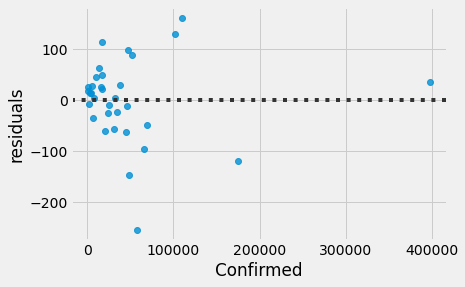

In [106]:
ax12=sns.residplot(y,Y_Pred)
ax12.set_ylabel('residuals')
plt.show()

Mô hình dự báo chính xác, sai lệch không quá 250 người (0.125%) ở mức dưới 200 nghìn người

In [103]:
residuals = Y_Pred - y
residuals=residuals.rename(columns={'Confirmed':'residuals'})
residuals.head(10)

residuals
New York        35.381803
New Jersey    -119.622100
Massachusetts  161.027014
Arizona        129.922933
Maryland       -49.333937
Virginia       -95.265997
Ohio          -254.212833
Tennessee       88.625253
Indiana       -146.298299
Connecticut     96.919950

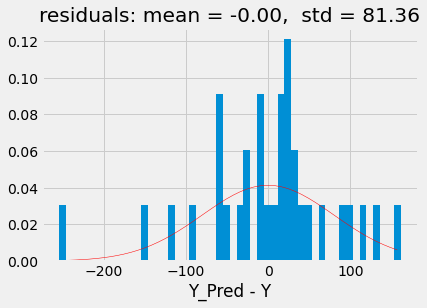

In [104]:
import scipy.stats as stats
#plotting residual distribution 
# Bin
n, bin_edges = np.histogram(residuals, 50)
# Normalize it, so that every bins value gives the probability of that bin
bin_probability = n/float(n.sum())
# Get the mid points of every bin
bin_middles = (bin_edges[1:]+bin_edges[:-1])/2.
# Compute the bin-width
bin_width = bin_edges[1]-bin_edges[0]
# Plot the histogram of residuals
plt.bar(bin_middles, bin_probability, width=bin_width)


# Fit to normal distribution
(mu, sigma) = stats.norm.fit(residuals)
std = residuals.std()
#plotting normal curve  
y_norm = stats.norm.pdf(bin_middles, mu, sigma)*bin_width
l = plt.plot(bin_middles, y_norm, 'r', linewidth=0.5)
plt.title( "residuals: mean = %.2f,  std = %.2f" % (mu, std))
plt.xlabel('Y_Pred - Y')
plt.show()